# **Capstone Modul III**
## Bank Marketing Campaign
### Dzaky Muhammad Baihaqi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# **1. Business Understanding**

## 1.1 CONTEXT

setiap jangka waktu tertentu Perusahaan Perbankan XXX melakukan campaign pemasaran deposito berjangka. campaign pemasaran dilakukan melalului panggilan telepon langsung. dari data kampanye pemasaran sebelumnya, perusahaan ingin mengefesiensi biaya campaign dengan mengindari melakukan penwawaran produk kepada customer mana yang tidak akan mengambil program deposito berjangka, sehingga perusahaan dapat menghindari customer mana saja yang seharusnya tidak ditelepon.

## 1.2 PROBLEM STATEMENT

Perusahaan Perbankan XXX ingin meningkatkan efisiensi dalam kampanye pemasaran deposito berjangka melalui panggilan telepon langsung. Saat ini, biaya yang dikeluarkan untuk kampanye pemasaran kurang optimal karena banyak customer yang tidak tertarik mengambil produk deposito berjangka. Untuk mengatasi masalah ini, perusahaan perlu mengembangkan model prediktif yang dapat mengidentifikasi customer dengan potensi rendah untuk menerima penawaran deposito, sehingga kampanye dapat lebih terarah, biaya dapat ditekan, dan produktivitas tim pemasaran dapat meningkat.

## 1.3 GOALS


- Meningkatkan Efisiensi Kampanye Pemasaran: Mengurangi biaya pemasaran dengan mengidentifikasi customer yang berpotensi rendah untuk menerima penawaran deposito berjangka.

- Mengoptimalkan Sumber Daya Pemasaran: Meminimalkan panggilan yang tidak efektif sehingga waktu dan sumber daya tim pemasaran dapat digunakan secara lebih efisien.

- Mengukur Keberhasilan Kampanye: Menggunakan model prediktif untuk mengevaluasi keberhasilan kampanye pemasaran dari sisi efisiensi biaya dan konversi customer.

## 1.4 StakeHolder

### Chief Marketing Officer (CMO)

Chief Marketing Officer memiliki fokus pada optimalisasi sumber daya dan penghematan biaya. Mereka akan tertarik pada hasil model prediktif yang membantu mengidentifikasi strategi kampanye yang lebih efektif, sehingga membantu perusahaan mengurangi pengeluaran dan meningkatkan efisiensi operasional. Dengan adanya model prediktif, tim pemasaran  yang dipimpin oleh Chief Marketing Officer dapat lebih efisien dalam mengarahkan kampanye kepada calon pelanggan yang lebih berpotensi melakukan deposito, sehingga mengurangi biaya kampanye yang tidak efektif dan meningkatkan produktivitas.

## 1.4 ANALYTIC APPROACH

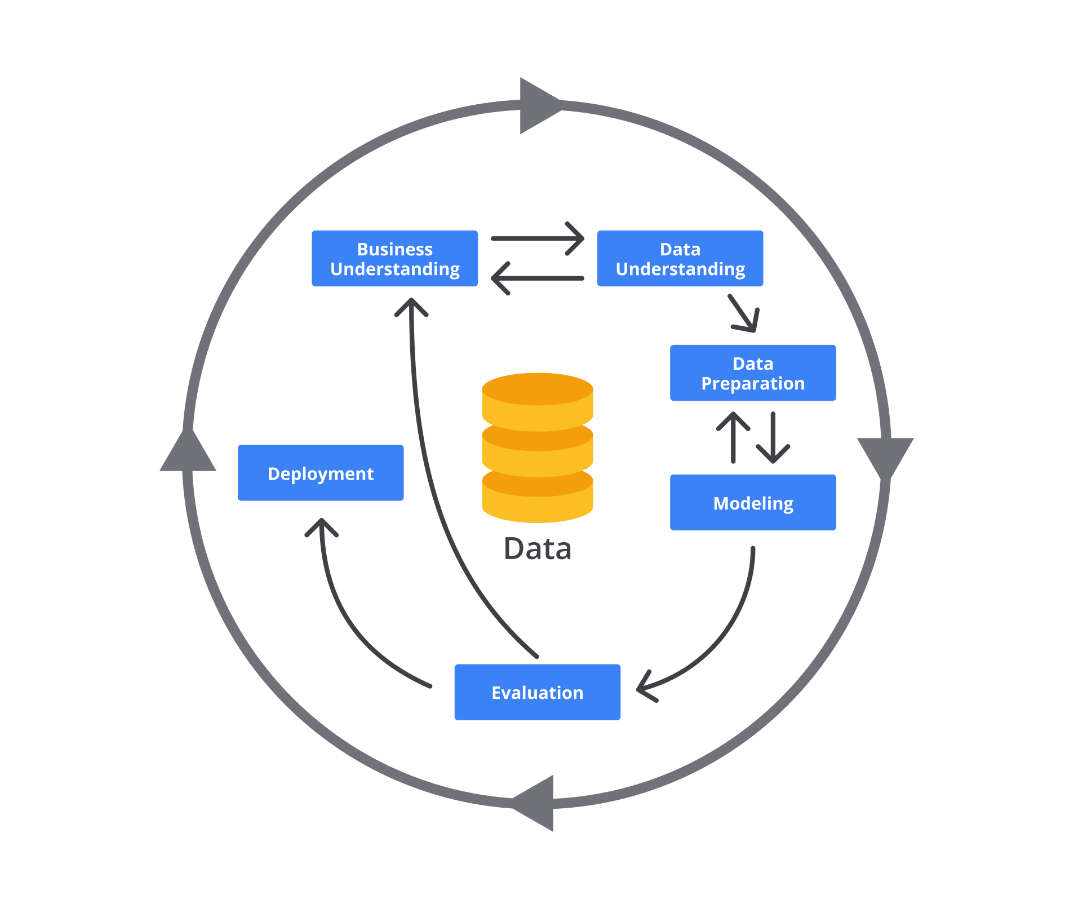

- CRISP-DM (Cross-Industry Standard Process for Data Mining) sebagai Pendekatan Analitik

- CRISP-DM adalah kerangka kerja proses standar yang digunakan dalam analitik data dan data mining. Diperkenalkan pada akhir 1990-an, CRISP-DM masih menjadi salah satu pendekatan yang paling populer untuk proyek analisis data dan telah diadopsi oleh berbagai industri karena fleksibilitas dan struktur sistematisnya. Pendekatan ini memberikan panduan tahap demi tahap yang memastikan bahwa proyek analitik atau data mining berjalan secara efektif dari awal hingga akhir.

## 1.5 EVALUASI MATRICS

target:<br>
1 : customer yang berpotensi mengambil program deposito berjangka<br>
0 : customer yang tidak berpotensi mengambil program deposito berjangka

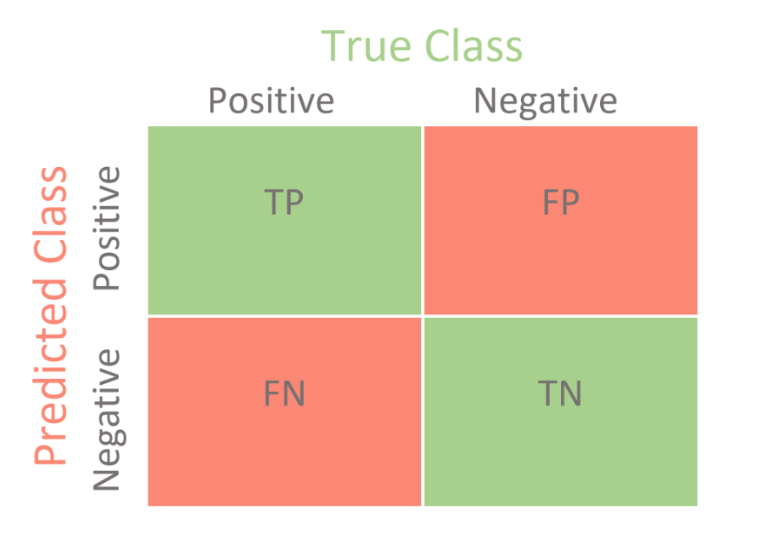

- TP = customer di prediksi yang deposit dan mengambil deposit 
- TN = customer di prediksi yang tidak akan mengambil deposit padahal akan melakukan deposit
- FP = customer di prediksi yang deposit, sebenarnya tidak akan mengambil deposit => kons= kita jadi perlu mengeluarkan biaya dan waktu yang lebih kepada customer yang sebenarnya tidak akan mengambil kampanye pemasaran 
- FN = customer di prediksi yang tidak akan deposit, sebenarnya berpotensi akan mengambil deposit => kita jadi kehilangan calon customer yang berpotensi akan mengambil deposit (kehilangan calon profit)

Penggunaan precision sebagai metrik evaluasi cocok untuk kasus ini karena precision berfokus pada False Positives (FP), yaitu customer yang diprediksi akan mengambil deposito, tetapi sebenarnya tidak. Dengan memaksimalkan precision, perusahaan dapat meminimalisir FP, sehingga hanya customer yang benar-benar tertarik yang akan dihubungi. Ini penting karena setiap panggilan yang salah sasaran (FP) berpotensi meningkatkan biaya kampanye pemasaran. Oleh karena itu, fokus pada precision membantu perusahaan menghemat biaya dengan menargetkan customer yang lebih tepat.

# **2. DATA UNDERSTANDING**

## 2.1 Explore Data

In [2]:
df=pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

age            job  balance housing loan    contact month  campaign  pdays  \
0   55         admin.     1662      no   no   cellular   jun         2     -1   
1   39  self-employed    -3058     yes  yes   cellular   apr         3     -1   
2   51         admin.     3025      no   no   cellular   may         1    352   
3   38       services      -87     yes   no   cellular   may         1     -1   
4   36      housemaid      205     yes   no  telephone   nov         4     -1   

  poutcome deposit  
0  unknown     yes  
1  unknown     yes  
2    other     yes  
3  unknown      no  
4  unknown      no

In [3]:
#melihat data unique di setiap kolom
pd.set_option('display.max_colwidth', None)
features=[]
unique=[]
nunique=[]
miss_sum=[]

for i in df.columns:
    features.append(i)
    unique.append(df.sort_values(i)[i].unique())
    nunique.append(df[i].nunique())
    miss_sum.append(df[i].isna().sum())

pd.DataFrame({'features':features,
            'unique':unique,
             'nunique':nunique,
             'miss_sum':miss_sum})


features  \
0        age   
1        job   
2    balance   
3    housing   
4       loan   
5    contact   
6      month   
7   campaign   
8      pdays   
9   poutcome   
10   deposit   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            unique  \
0                                                                                                                                                                                                                                                                                                                                     [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 95]   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown]   
2   [-6847, -3058, -2282, -1965, -1944, -1701, -1636, -1531, -1489, -1451, -1415, -1386, -1206, -1139, -1053, -1050, -1042, -994, -974, -972, -971, -970, -938, -934, -930, -888, -887, -861, -849, -839, -825, -824, -813, -811, -805, -799, -782, -770, -762, -754, -752, -745, -722, -713, -701, -700, -675, -671, -666, -663, -639, -637, -636, -634, -633, -616, -614, -613, -601, -600, -588, -581, -575, -565, -558, -556, -553, -547, -546, -538, -529, -522, -516, -509, -508, -505, -504, -498, -497, -496, -493, -492, -491, -487, -479, -475, -473, -470, -468, -467, -466, -463, -462, -461, -456, -454, -451, -449, -448, -444, ...]   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [no, yes]   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [no, yes]   
5                              

Dataset yang disediakan berisi 7813 data. 
Kita akan membagi data tersebut menjadi 2 data
1. 80% data akan menjadi data train untuk melatih model
2. 20% data akan menjadi data test untuk mengevaluasi model

| **Kategori Kolom**       | **Kolom**  | **Deskripsi**                                           |
|--------------------------|------------|---------------------------------------------------------|
| **Profil Pelanggan**     | age       | Usia dari klien                                         |
|                          | job  | Jenis pekerjaan dari klien                              |
|                          | balance      | Saldo rekening                                          |
|                          | housing  | Apakah klien memiliki pinjaman perumahan                |
|                          | loan   | Apakah klien memiliki pinjaman pribadi                  |
| **Data Pemasaran**       | contact     | Jenis komunikasi kontak                                 |
|                          | month      | Bulan kontak terakhir dalam tahun                       |
|                          | campaign   | Jumlah kontak yang dilakukan selama kampanye ini untuk klien |
|                          | pdays      | Jumlah hari setelah klien dihubungi dari kampanye sebelumnya |
|                          | poutcome | Hasil dari kampanye pemasaran sebelumnya             |
|                          | deposit    | Apakah pelanggan melakukan deposito atau tidak          |

In [4]:
#encode deposit to numeric
df["deposit"] = np.where(df["deposit"]=="no",0,1)

In [5]:
#memisahkan X dan y untuk dilakukan train_test_split
X = df.drop("deposit",axis=1)
y = df["deposit"]

In [6]:
#Memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
display(X_train.shape,X_test.shape)

(6250, 10)

(1563, 10)

In [7]:
#Concat train features data
train = pd.concat([X_train,y_train],axis=1)
train

age         job  balance housing loan   contact month  campaign  pdays  \
1459   56  management      563     yes   no  cellular   may         2    168   
3231   32  technician      390     yes   no   unknown   may         1     -1   
2502   30      admin.       69     yes   no  cellular   apr         1     -1   
4107   31    services     -205      no   no  cellular   sep         1    579   
3994   34      admin.     -312     yes   no   unknown   may         1     -1   
...   ...         ...      ...     ...  ...       ...   ...       ...    ...   
2640   23    services      279     yes   no  cellular   may         1    370   
6831   32  technician      267      no   no  cellular   may         1     -1   
3248   35  technician       33      no   no  cellular   aug         2     -1   
6736   32   housemaid       10     yes   no   unknown   jun         2     -1   
2303   39  management     2193     yes  yes   unknown   jun         3     -1   

     poutcome  deposit  
1459  failure        0  
3231  unknown        0  
2502  unknown        1  
4107  failure        1  
3994  unknown        0  
...       ...      ...  
2640  failure        1  
6831  unknown        0  
3248  unknown        0  
6736  unknown        0  
2303  unknown        0  

[6250 rows x 11 columns]

In [8]:
#Concat test features data
test = pd.concat([X_test,y_test],axis=1)
test

age          job  balance housing loan   contact month  campaign  pdays  \
2266   32   management     -383     yes   no   unknown   may         1     -1   
7393   37     services      608      no   no  cellular   may         3     -1   
1541   31       admin.     -422     yes   no  cellular   may         2    329   
1426   30  blue-collar      128     yes   no   unknown   may         1     -1   
2454   56   management     7747      no   no   unknown   jun         2     -1   
...   ...          ...      ...     ...  ...       ...   ...       ...    ...   
1229   41   technician       30     yes   no  cellular   jul         1     -1   
592    30   management      398      no   no  cellular   apr         2     -1   
5555   45   management       80      no  yes  cellular   nov         1     -1   
6421   46       admin.     5511      no   no  cellular   jul         2    389   
1693   39     services      410      no   no   unknown   jun         4     -1   

     poutcome  deposit  
2266  unknown        0  
7393  unknown        0  
1541    other        0  
1426  unknown        0  
2454  unknown        0  
...       ...      ...  
1229  unknown        0  
592   unknown        1  
5555  unknown        0  
6421  success        1  
1693  unknown        0  

[1563 rows x 11 columns]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6250 entries, 1459 to 2303
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       6250 non-null   int64 
 1   job       6250 non-null   object
 2   balance   6250 non-null   int64 
 3   housing   6250 non-null   object
 4   loan      6250 non-null   object
 5   contact   6250 non-null   object
 6   month     6250 non-null   object
 7   campaign  6250 non-null   int64 
 8   pdays     6250 non-null   int64 
 9   poutcome  6250 non-null   object
 10  deposit   6250 non-null   int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 561.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1563 entries, 2266 to 1693
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1563 non-null   int64 
 1   job       1563 non-null   object
 2   balance   1563 non-null   int64 
 3   housing   1563 non-null   object
 4   loan      1563 non-null   object
 5   contact   1563 non-null   object
 6   month     1563 non-null   object
 7   campaign  1563 non-null   int64 
 8   pdays     1563 non-null   int64 
 9   poutcome  1563 non-null   object
 10  deposit   1563 non-null   int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 140.4+ KB


 ### Data Numerik

In [11]:
train_num = train.select_dtypes(include = 'number')
train_num.describe()

age       balance     campaign        pdays      deposit
count  6250.000000   6250.000000  6250.000000  6250.000000  6250.000000
mean     41.224800   1507.599360     2.513760    51.525120     0.477600
std      11.899612   3028.937658     2.713778   108.577223     0.499538
min      18.000000  -6847.000000     1.000000    -1.000000     0.000000
25%      32.000000    129.250000     1.000000    -1.000000     0.000000
50%      39.000000    556.000000     2.000000    -1.000000     0.000000
75%      49.000000   1693.000000     3.000000    48.000000     1.000000
max      95.000000  52587.000000    63.000000   854.000000     1.000000

In [12]:
test_num = test.select_dtypes(include = 'number')
test_num.describe()

age       balance     campaign        pdays      deposit
count  1563.000000   1563.000000  1563.000000  1563.000000  1563.000000
mean     41.387076   1531.839411     2.543826    50.942418     0.477927
std      12.002689   3320.638909     2.779999   106.064444     0.499672
min      18.000000  -1531.000000     1.000000    -1.000000     0.000000
25%      32.000000    118.500000     1.000000    -1.000000     0.000000
50%      39.000000    518.000000     2.000000    -1.000000     0.000000
75%      49.000000   1636.000000     3.000000    20.500000     1.000000
max      88.000000  66653.000000    30.000000   769.000000     1.000000

 ### Data Kategorik

In [13]:
train_obj = train.select_dtypes(include = 'object')
train_obj.describe()

job housing  loan   contact month poutcome
count         6250    6250  6250      6250  6250     6250
unique          12       2     2         3    12        4
top     management      no    no  cellular   may  unknown
freq          1432    3322  5420      4509  1597     4650

In [14]:
test_obj = test.select_dtypes(include = 'object')
test_obj.describe()

job housing  loan   contact month poutcome
count         1563    1563  1563      1563  1563     1563
unique          12       2     2         3    12        4
top     management      no    no  cellular   may  unknown
freq           360     818  1369      1119   379     1169

## 2.2 Exploratory Data Analysis (EDA)


 `Univariate` : Object

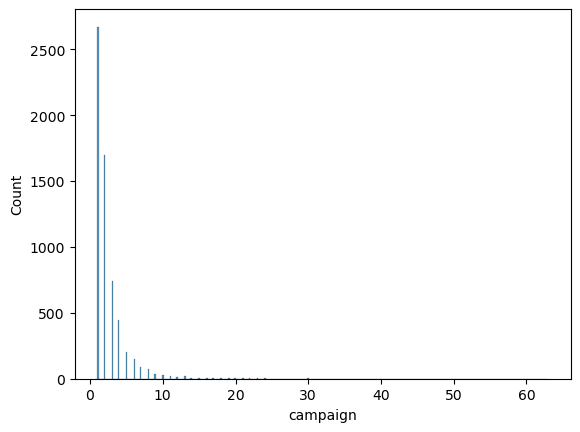

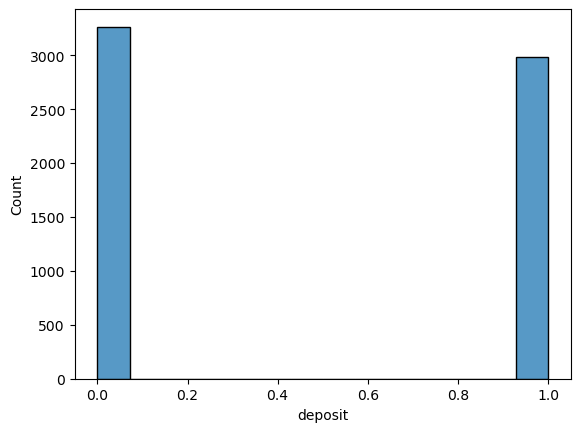

In [15]:
for x in train.select_dtypes(include = 'number').columns:
    sns.histplot(train_num[x])
    plt.show()

In [16]:
from scipy.stats import normaltest

# Apply normaltest to each column and collect the p-values
normality_results = train.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

Column        p-value
0       age  1.958894e-146
1   balance   0.000000e+00
2  campaign   0.000000e+00
3     pdays   0.000000e+00
4   deposit   0.000000e+00

In [17]:
normality_results[normality_results['p-value']<=0.05]['Column'].unique()

array(['age', 'balance', 'campaign', 'pdays', 'deposit'], dtype=object)

Terlihat semua data numerik tidak terdistribusi normal, maka pada model pipeline semua fitur akan dilakukan scaling robust agar model lebih konsisten.

 `Univariate` : Object

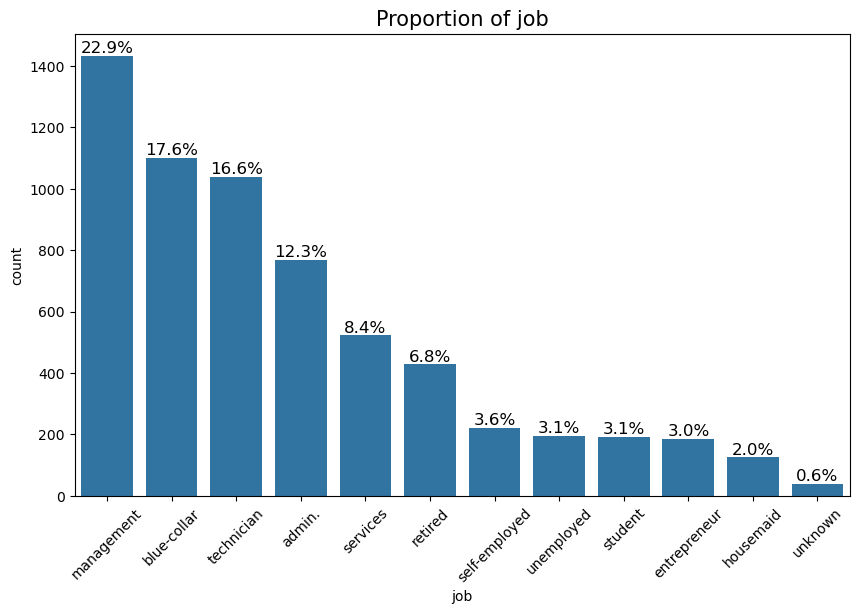

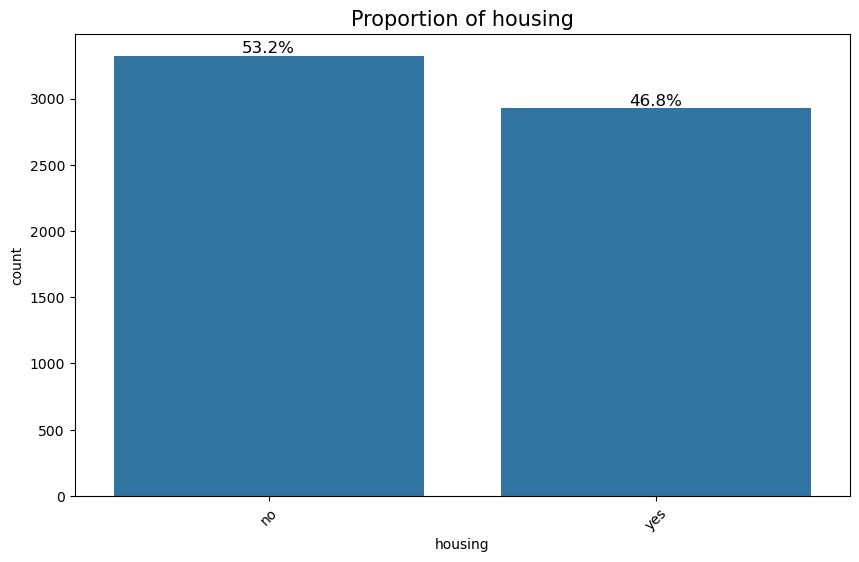

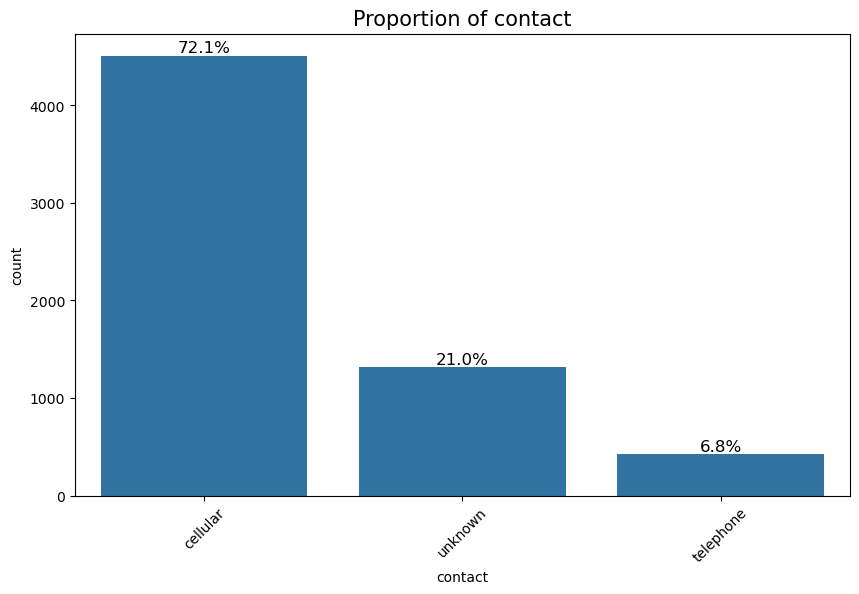

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop melalui semua kolom kategorikal
for x in train.select_dtypes(include='object'):
    plt.figure(figsize=(10, 6), dpi=100)
    
    # Hitung frekuensi nilai dari kolom kategorikal
    count_values = train[x].value_counts(ascending=False)
    
    # Plot countplot dengan urutan sesuai jumlah kemunculan
    ax = sns.countplot(data=train, x=x, order=count_values.index)
    
    # Rotasi label sumbu-x agar lebih mudah dibaca
    plt.xticks(rotation=45)
    
    # Tambahkan judul dengan nama kolom
    plt.title(f"Proportion of {x}", fontsize=15)
    
    # Hitung nilai relatif dalam persen
    rel_values = count_values.values / len(train) * 100
    
    # Buat label untuk setiap bar
    lbls = [f'{p:1.1f}%' for p in rel_values]
    
    # Pastikan jumlah bar dan label sama, lalu tambahkan label di atas bar
    if len(ax.containers[0]) == len(lbls):
        ax.bar_label(container=ax.containers[0], labels=lbls, label_type='edge', fontsize=12)
    else:
        print(f'Warning: number of bars ({len(ax.containers[0])}) and labels ({len(lbls)}) do not match.')
    
    # Menampilkan plot
    plt.show()


- Job (Pekerjaan): Mayoritas pelanggan bekerja di bidang manajemen (23.5%), diikuti oleh pekerja blue-collar (17.6%) dan teknisi (16.7%). Profesi lain seperti admin, pensiunan, dan layanan publik juga terlihat, namun dengan proporsi yang lebih kecil.

- Housing (Perumahan): Sebagian besar pelanggan tidak memiliki pinjaman perumahan (53.2%), sementara sisanya (46.8%) memiliki pinjaman perumahan.

- Loan (Pinjaman Pribadi): Mayoritas pelanggan tidak memiliki pinjaman pribadi (86.7%), hanya 13.3% pelanggan yang memiliki pinjaman pribadi.

- Contact (Metode Kontak): Sebagian besar pelanggan dihubungi melalui telepon seluler (93.2%), sementara sangat sedikit yang dihubungi melalui telepon rumah (6.8%).

- Month (Bulan Kontak): Bulan dengan jumlah kontak tertinggi adalah bulan Mei (25.5%), diikuti oleh Agustus (13.9%) dan Juli (13.1%). Bulan-bulan seperti September, Maret, dan Desember memiliki jumlah kontak paling sedikit.

= Poutcome (Hasil Kampanye Sebelumnya): Sebagian besar pelanggan memiliki status hasil kampanye yang tidak diketahui karena belum dihubungi sebanyak (74.4%). Sebanyak 11.1% gagal dalam kampanye sebelumnya, dan hanya 9.7% yang sukses sedangkan sisanya sebanyak 4.8% belum memberikan follow up terkait kampanye.

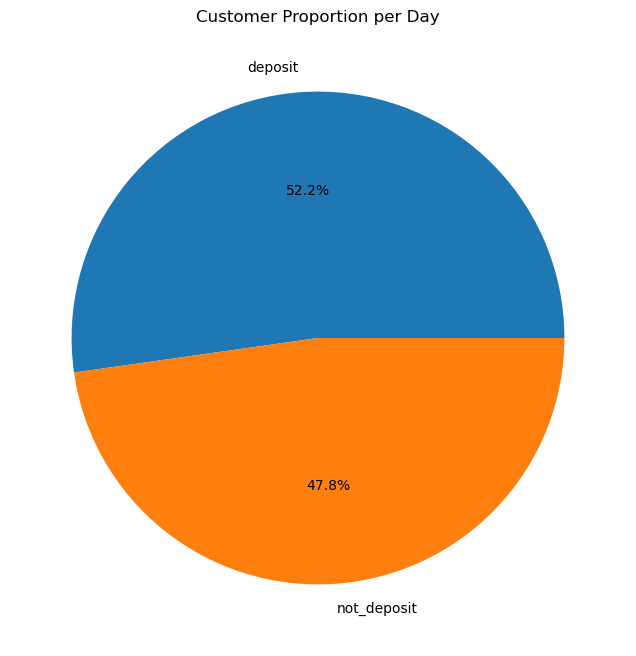

In [19]:
train_agg3=train['deposit'].value_counts(normalize=1).reset_index()
train_agg3['percentage']=100*train_agg3['proportion']
train_agg3

plt.figure(figsize=(10, 8))
plt.pie(data=train_agg3,x='percentage',labels=['deposit','not_deposit'], autopct='%1.1f%%'
       ,textprops=dict(color="black"))
plt.title('Customer Proportion per Day')
plt.show()

- Dari pie chart ini, kita bisa melihat bahwa 52.2% dari pelanggan telah melakukan deposit (warna biru), sedangkan 47.8% pelanggan tidak melakukan deposit (warna oranye).

- Perbedaan antara keduanya relatif kecil, menunjukkan bahwa jumlah pelanggan yang melakukan deposit dan yang tidak hampir seimbang. Hal ini dapat mengindikasikan bahwa kampanye atau produk deposit yang ditawarkan oleh perusahaan menarik bagi sebagian besar pelanggan, tetapi masih ada hampir setengahnya yang belum melakukan deposit.

### Korelasi Antar Kolom

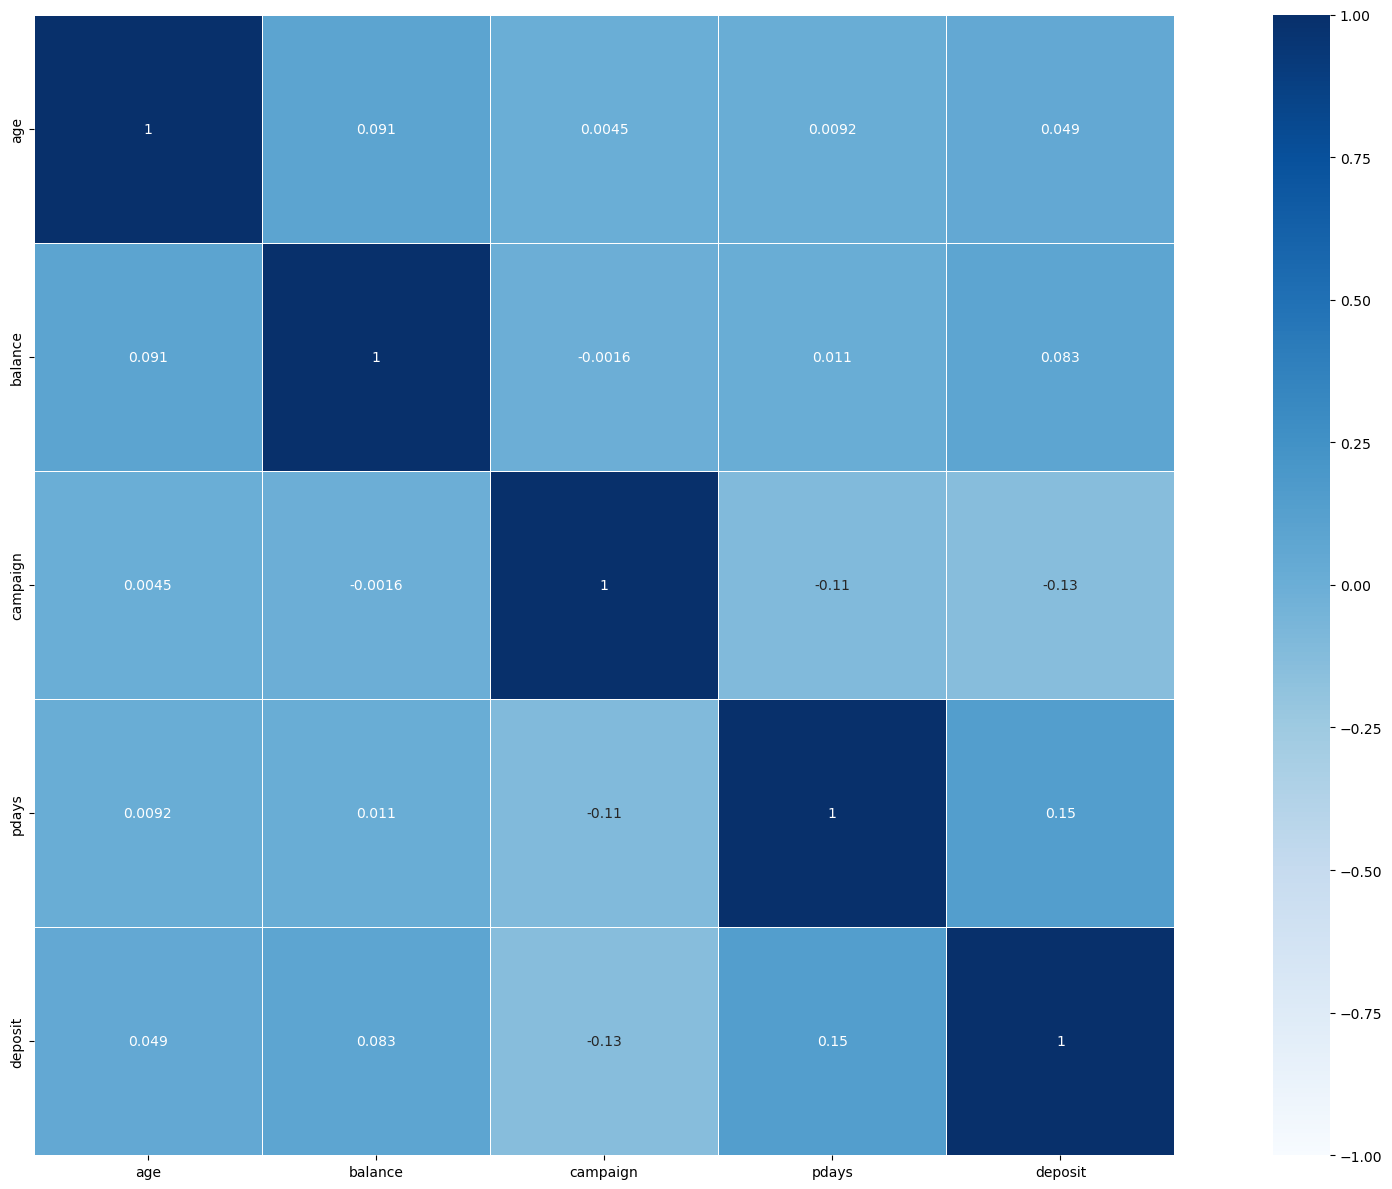

In [20]:
# Plot korelasi
import seaborn as sns
import matplotlib.pyplot as plt
corr = train_num.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, cmap='Blues', annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()

Korelasi antar variabel secara keseluruhan cukup lemah, menunjukkan bahwa tidak ada hubungan linear yang kuat antara fitur-fitur seperti age, balance, campaign, pdays dengan variabel target deposit. Namun, kita bisa melihat beberapa pola kecil, misalnya, adanya sedikit hubungan positif antara pdays dan deposit, serta sedikit pengaruh negatif dari jumlah kontak kampanye terhadap kemungkinan deposito.

# **3.Data Preparation**

Pada bagian ini, adalah bagian tahap persiapan data train dan test sebelum digunakan untuk melatih dan menguji model. Langkah - langkah data prepration yang dilalui adalah:

- Handling Missing Value

- Handling Data Duplicates pada Data Train

- Data Range Constrains

- Handling Outlier

- Feature Engineering

- Handling Categorical Data

In [21]:
X_label=train.select_dtypes(include = 'number')
X_label

age  balance  campaign  pdays  deposit
1459   56      563         2    168        0
3231   32      390         1     -1        0
2502   30       69         1     -1        1
4107   31     -205         1    579        1
3994   34     -312         1     -1        0
...   ...      ...       ...    ...      ...
2640   23      279         1    370        1
6831   32      267         1     -1        0
3248   35       33         2     -1        0
6736   32       10         2     -1        0
2303   39     2193         3     -1        0

[6250 rows x 5 columns]

### Data Cleaning

#### Handling Missing Value

In [22]:
#Memeriksa jumlah NaN Values
display(train.isna().sum())
display(test.isna().sum())

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

Tidak ditemukan adanya missing values pada dataset test dan train

#### Handling Data Duplicates pada Data Train

In [23]:
#Memeriksa jumlah data duplikat pada data Train
display(train.duplicated().sum())

5

In [24]:
#Menghapus data duplikat pada data Train
train = train.drop_duplicates()

display(train.shape)

(6245, 11)

Terdapat data duplikat pada data train. Maka saya akan menghapus baris data yang mengandung data duplikat tersebut.

### Data Range Constrains

In [25]:
#Melihat value pada pdays berdasarkan poutome pada data train
display(train.groupby("poutcome")[["pdays"]].value_counts())

poutcome  pdays
failure    181       12
           92        12
           91        10
           182       10
           183       10
                   ... 
success    171        1
           168        1
           156        1
unknown   -1       4644
           188        1
Name: count, Length: 667, dtype: int64

In [26]:
#Melihat value pada pdays berdasarkan poutome pada data test
display(test.groupby("poutcome")[["pdays"]].value_counts())

poutcome  pdays
failure    342        4
           323        3
           197        3
           356        3
           365        3
                   ... 
success    306        1
           300        1
           279        1
unknown   -1       1168
           98         1
Name: count, Length: 262, dtype: int64

In [27]:
#Melihat unique values pada data train untuk kolom poutome
display(train["poutcome"].value_counts())
train[train["poutcome"]=="other"].sort_values("pdays")

poutcome
unknown    4645
failure     695
success     607
other       298
Name: count, dtype: int64

age          job  balance housing loan    contact month  campaign  \
5787   31   management     1384     yes   no   cellular   jan         2   
1605   28  blue-collar     1285      no   no  telephone   jan         2   
5753   31   unemployed      315      no   no   cellular   jan         1   
810    35   technician      633     yes  yes   cellular   feb         3   
3151   26  blue-collar      184      no   no   cellular   feb         2   
...   ...          ...      ...     ...  ...        ...   ...       ...   
1937   56   management    12356     yes   no   cellular   may         1   
4683   60     services     4256     yes   no   cellular   aug         3   
1324   27  blue-collar      821     yes  yes    unknown   sep         1   
399    31  blue-collar        0     yes   no    unknown   aug         1   
6918   32   technician     1547      no   no   cellular   oct         1   

      pdays poutcome  deposit  
5787      2    other        0  
1605      2    other        0  
5753      2    other        0  
810       5    other        0  
3151      6    other        0  
...     ...      ...      ...  
1937    551    other        1  
4683    761    other        1  
1324    778    other        0  
399     782    other        1  
6918    805    other        1  

[298 rows x 11 columns]

In [28]:
#Mengubah nilai poutcomes yang bermasalah pada data train
print("before")
display(train.groupby("poutcome")[["pdays"]].value_counts())

train["poutcome"] = np.where((train["pdays"]>0) & (train["poutcome"]=="unknown"),"other",train["poutcome"])

print("after")
display(train.groupby("poutcome")[["pdays"]].value_counts())

before


poutcome  pdays
failure    181       12
           92        12
           91        10
           182       10
           183       10
                   ... 
success    171        1
           168        1
           156        1
unknown   -1       4644
           188        1
Name: count, Length: 667, dtype: int64

after


C:\Users\dzaky\AppData\Local\Temp\ipykernel_25480\3769616868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["poutcome"] = np.where((train["pdays"]>0) & (train["poutcome"]=="unknown"),"other",train["poutcome"])


poutcome  pdays
failure    181       12
           92        12
           91        10
           182       10
           183       10
                   ... 
success    133        1
           130        1
           127        1
           121        1
unknown   -1       4644
Name: count, Length: 666, dtype: int64

In [29]:
#Mengubah nilai poutcomes yang bermasalah pada data test
print("before")
display(test.groupby("poutcome")[["pdays"]].value_counts())

test["poutcome"] = np.where((test["pdays"]>0) & (test["poutcome"]=="unknown"),"other",test["poutcome"])

print("after")
display(test.groupby("poutcome")[["pdays"]].value_counts())

before


poutcome  pdays
failure    342        4
           323        3
           197        3
           356        3
           365        3
                   ... 
success    306        1
           300        1
           279        1
unknown   -1       1168
           98         1
Name: count, Length: 262, dtype: int64

after


poutcome  pdays
failure    342        4
           356        3
           323        3
           197        3
           91         3
                   ... 
success    86         1
           88         1
           279        1
           277        1
unknown   -1       1168
Name: count, Length: 261, dtype: int64

In [30]:
train[train['poutcome']=='unknown']['pdays'].unique()

array([-1], dtype=int64)

- Pada data sebelum transformasi, terdapat kombinasi nilai poutcome "unknown" dengan nilai pdays yang lebih besar dari 0.
- Pada data setelah transformasi, nilai poutcome untuk kasus di mana pdays > 0 dan poutcome = "unknown" telah diubah menjadi "other".
- Hal ini menyebabkan berkurangnya satu kombinasi unik di dalam dataset, menunjukkan bahwa transformasi tersebut berhasil mengatasi nilai poutcome yang tidak valid.

### Handling Outlier

In [31]:
#Melihat summary descriptive data train dan test
display(train.describe())

display(test.describe())

age       balance     campaign        pdays      deposit
count  6245.000000   6245.000000  6245.000000  6245.000000  6245.000000
mean     41.223379   1508.768135     2.514331    51.567174     0.477662
std      11.901094   3029.867130     2.714706   108.610509     0.499541
min      18.000000  -6847.000000     1.000000    -1.000000     0.000000
25%      32.000000    130.000000     1.000000    -1.000000     0.000000
50%      39.000000    556.000000     2.000000    -1.000000     0.000000
75%      49.000000   1693.000000     3.000000    50.000000     1.000000
max      95.000000  52587.000000    63.000000   854.000000     1.000000

age       balance     campaign        pdays      deposit
count  1563.000000   1563.000000  1563.000000  1563.000000  1563.000000
mean     41.387076   1531.839411     2.543826    50.942418     0.477927
std      12.002689   3320.638909     2.779999   106.064444     0.499672
min      18.000000  -1531.000000     1.000000    -1.000000     0.000000
25%      32.000000    118.500000     1.000000    -1.000000     0.000000
50%      39.000000    518.000000     2.000000    -1.000000     0.000000
75%      49.000000   1636.000000     3.000000    20.500000     1.000000
max      88.000000  66653.000000    30.000000   769.000000     1.000000

count    6250.000000
mean       41.224800
std        11.899612
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: age, dtype: float64
upperlimit: 74
lowerlimit: 18
outlier: count: 96 proportion: 0.01536


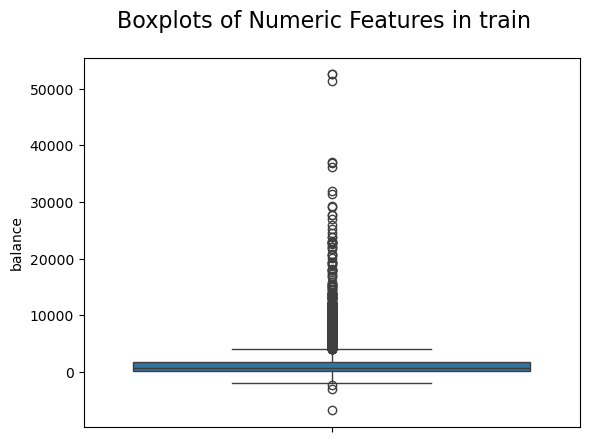

count     6250.000000
mean      1507.599360
std       3028.937658
min      -6847.000000
25%        129.250000
50%        556.000000
75%       1693.000000
max      52587.000000
Name: balance, dtype: float64
upperlimit: 4031
lowerlimit: -1965
outlier: count: 578 proportion: 0.09248


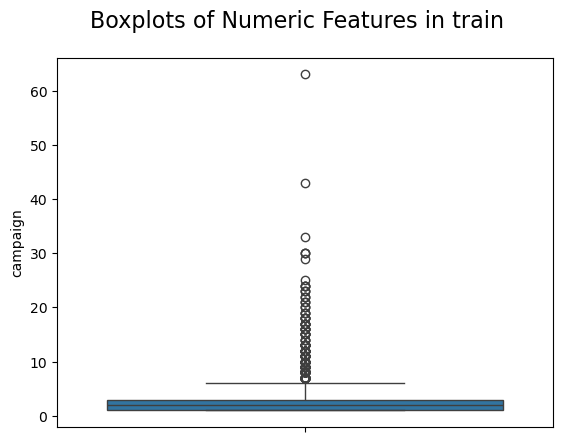

count    6250.000000
mean        2.513760
std         2.713778
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        63.000000
Name: campaign, dtype: float64
upperlimit: 6
lowerlimit: 1
outlier: count: 341 proportion: 0.05456


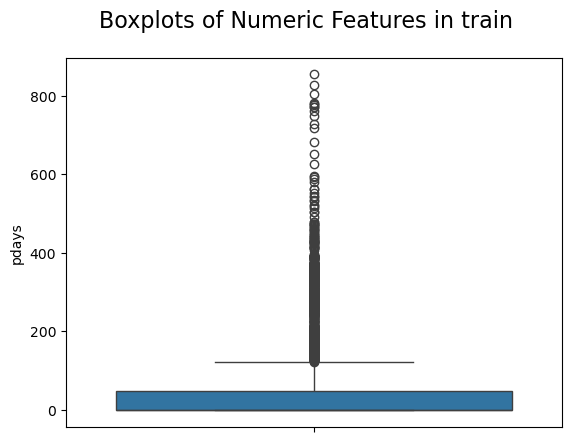

count    6250.000000
mean       51.525120
std       108.577223
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        48.000000
max       854.000000
Name: pdays, dtype: float64
upperlimit: 121
lowerlimit: -1
outlier: count: 1087 proportion: 0.17392


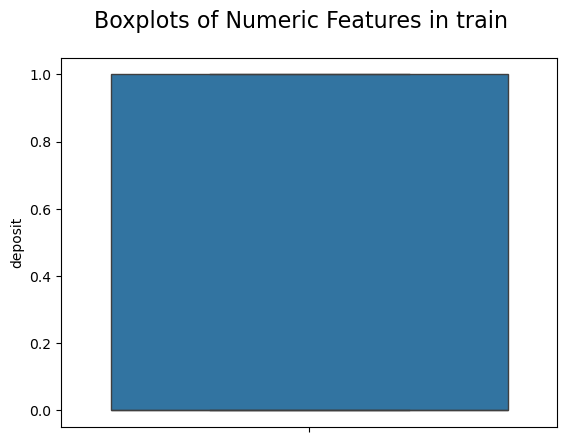

count    6250.000000
mean        0.477600
std         0.499538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: deposit, dtype: float64
upperlimit: 1
lowerlimit: 0
outlier: count: 0 proportion: 0.0


In [32]:
for x in train_num.columns:
    # boxplot
    sns.boxplot(y=train_num[x])
    plt.suptitle("Boxplots of Numeric Features in train", fontsize=16)
    plt.show()
   
    
    # statistic metrics
    print(train_num[x].describe())
    q1 = np.percentile(train_num[x], 25)
    q3 = np.percentile(train_num[x], 75)
    iqr = q3-q1
    upperbound = q3+1.5*iqr
    lowerbound = q1-1.5*iqr
    upperlimit = np.max(train_num[x][train_num[x]<=upperbound])
    lowerlimit = np.min(train_num[x][train_num[x]>=lowerbound])
    print('upperlimit: {}'.format(upperlimit))
    print('lowerlimit: {}'.format(lowerlimit))
    outlier = train_num[x][(train_num[x]>upperbound) | (train_num[x]<lowerbound)]
    print('outlier: count: {} proportion: {}'.format(len(outlier), len(outlier)/len(train_num[x])))

Pada train data,  terdapat extreme outlier pada data campaign dan balance

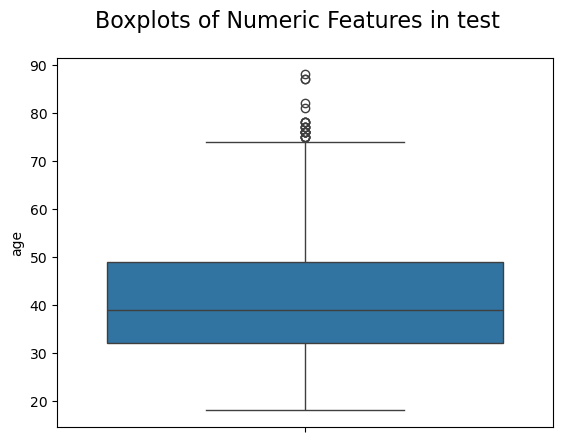

count    6250.000000
mean       41.224800
std        11.899612
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: age, dtype: float64
upperlimit: 74
lowerlimit: 18
outlier: count: 25 proportion: 0.01599488163787588


count     6250.000000
mean      1507.599360
std       3028.937658
min      -6847.000000
25%        129.250000
50%        556.000000
75%       1693.000000
max      52587.000000
Name: balance, dtype: float64
upperlimit: 3842
lowerlimit: -1531
outlier: count: 162 proportion: 0.1036468330134357


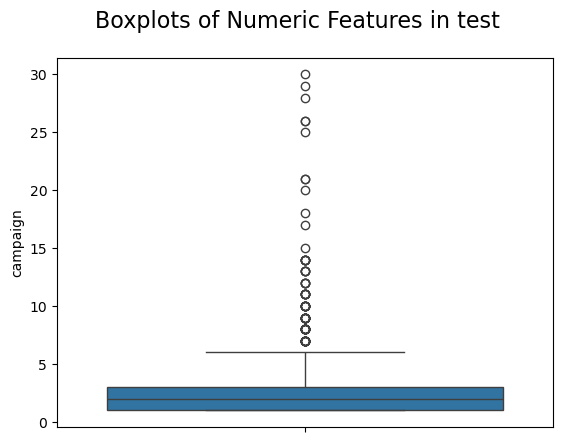

count    6250.000000
mean        2.513760
std         2.713778
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        63.000000
Name: campaign, dtype: float64
upperlimit: 6
lowerlimit: 1
outlier: count: 88 proportion: 0.0563019833653231


count    6250.000000
mean       51.525120
std       108.577223
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        48.000000
max       854.000000
Name: pdays, dtype: float64
upperlimit: 43
lowerlimit: -1
outlier: count: 383 proportion: 0.24504158669225848


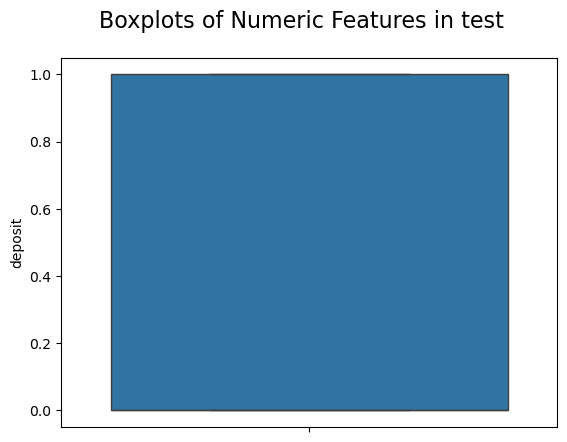

count    6250.000000
mean        0.477600
std         0.499538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: deposit, dtype: float64
upperlimit: 1
lowerlimit: 0
outlier: count: 0 proportion: 0.0


In [33]:
for x in test_num.columns:
    # boxplot
    sns.boxplot(y=test_num[x])
    plt.suptitle("Boxplots of Numeric Features in test", fontsize=16)
    plt.show()
   
    
    # statistic metrics
    print(train_num[x].describe())
    q1 = np.percentile(test_num[x], 25)
    q3 = np.percentile(test_num[x], 75)
    iqr = q3-q1
    upperbound = q3+1.5*iqr
    lowerbound = q1-1.5*iqr
    upperlimit = np.max(test_num[x][test_num[x]<=upperbound])
    lowerlimit = np.min(test_num[x][test_num[x]>=lowerbound])
    print('upperlimit: {}'.format(upperlimit))
    print('lowerlimit: {}'.format(lowerlimit))
    outlier = test_num[x][(test_num[x]>upperbound) | (test_num[x]<lowerbound)]
    print('outlier: count: {} proportion: {}'.format(len(outlier), len(outlier)/len(test_num[x])))

Pada test data, ditemukan juga extreme outlier pada data campaign dan balance

Setelah menganalisa jumlah outlier pada fitur numeric menggunakan boxplot ditemukan terdapat banyak data outlier. 

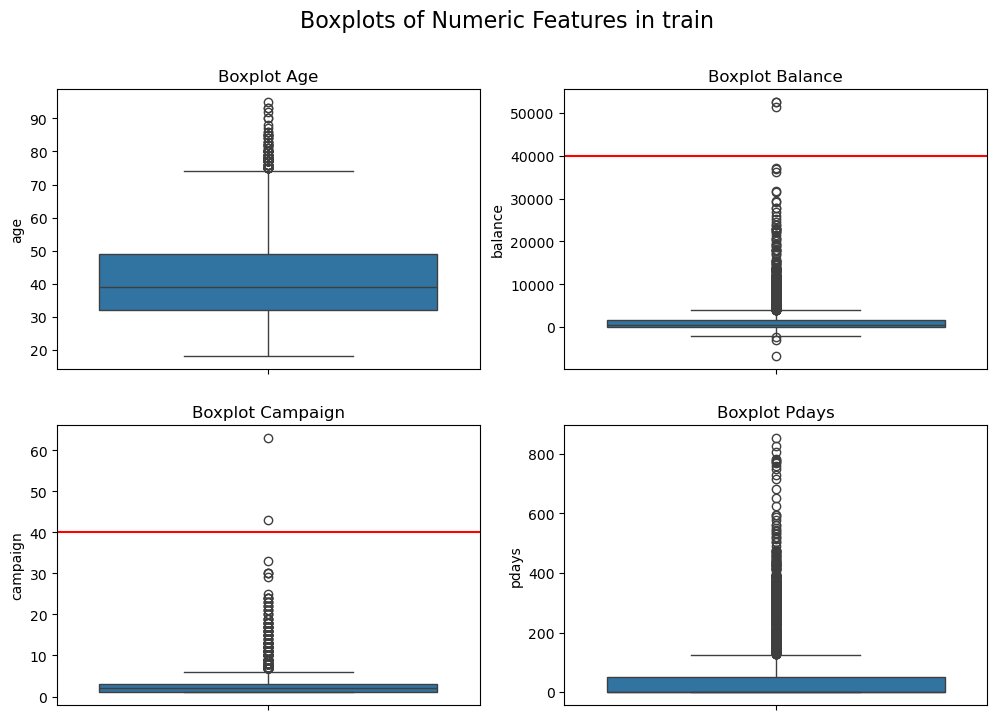

In [34]:
#Menandai data outlier pada train data yang akan dihapus
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(train["age"])
plt.title("Boxplot Age")

plt.subplot(2,2,2)
sns.boxplot(train["balance"])
plt.axhline(40000,c='r')
plt.title("Boxplot Balance")

plt.subplot(2,2,3)
sns.boxplot(train["campaign"])
plt.axhline(40,c='r')
plt.title("Boxplot Campaign")

plt.subplot(2,2,4)
sns.boxplot(train["pdays"])
plt.title("Boxplot Pdays")

plt.suptitle("Boxplots of Numeric Features in train", fontsize=16)

plt.show()

In [35]:
#drop all outlier pada data train
train = train[train["campaign"]<40]
train = train[train["balance"]<40000]
    
train

age         job  balance housing loan   contact month  campaign  pdays  \
1459   56  management      563     yes   no  cellular   may         2    168   
3231   32  technician      390     yes   no   unknown   may         1     -1   
2502   30      admin.       69     yes   no  cellular   apr         1     -1   
4107   31    services     -205      no   no  cellular   sep         1    579   
3994   34      admin.     -312     yes   no   unknown   may         1     -1   
...   ...         ...      ...     ...  ...       ...   ...       ...    ...   
2640   23    services      279     yes   no  cellular   may         1    370   
6831   32  technician      267      no   no  cellular   may         1     -1   
3248   35  technician       33      no   no  cellular   aug         2     -1   
6736   32   housemaid       10     yes   no   unknown   jun         2     -1   
2303   39  management     2193     yes  yes   unknown   jun         3     -1   

     poutcome  deposit  
1459  failure        0  
3231  unknown        0  
2502  unknown        1  
4107  failure        1  
3994  unknown        0  
...       ...      ...  
2640  failure        1  
6831  unknown        0  
3248  unknown        0  
6736  unknown        0  
2303  unknown        0  

[6240 rows x 11 columns]

In [36]:
#Hasil setelah menghapus data outlier pada data train
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(train["age"])
plt.title("Boxplot Age")

plt.subplot(2,2,2)
sns.boxplot(train["balance"])
plt.title("Boxplot Balance")

plt.subplot(2,2,3)
sns.boxplot(train["campaign"])
plt.title("Boxplot Campaign")

plt.subplot(2,2,4)
sns.boxplot(train["pdays"])
plt.title("Boxplot Pdays")

plt.suptitle("Boxplots of Numeric Features in train", fontsize=16)

plt.show()

In [37]:
#Batasan model pada data train (data numeric)
train.describe()

age       balance     campaign        pdays      deposit
count  6240.00000   6240.000000  6240.000000  6240.000000  6240.000000
mean     41.21250   1483.421795     2.498558    51.578846     0.477724
std      11.89838   2818.050946     2.554487   108.631934     0.499544
min      18.00000  -6847.000000     1.000000    -1.000000     0.000000
25%      32.00000    130.000000     1.000000    -1.000000     0.000000
50%      39.00000    556.000000     2.000000    -1.000000     0.000000
75%      49.00000   1690.750000     3.000000    50.000000     1.000000
max      95.00000  37127.000000    33.000000   854.000000     1.000000

# Feature Engenering

In [38]:
train_label=train.select_dtypes(include = 'number')
train_label

age  balance  campaign  pdays  deposit
1459   56      563         2    168        0
3231   32      390         1     -1        0
2502   30       69         1     -1        1
4107   31     -205         1    579        1
3994   34     -312         1     -1        0
...   ...      ...       ...    ...      ...
2640   23      279         1    370        1
6831   32      267         1     -1        0
3248   35       33         2     -1        0
6736   32       10         2     -1        0
2303   39     2193         3     -1        0

[6240 rows x 5 columns]

#### Bin Age

In [39]:
train['bin_age']=pd.cut(train['age'],bins=[0, 25, 40, 60, float('inf')],labels=["<25 tahun","25 - 40 tahun", "41 - 60 tahun",">60 tahun"])
bin_column = 'bin_age'
display(train.head())

age         job  balance housing loan   contact month  campaign  pdays  \
1459   56  management      563     yes   no  cellular   may         2    168   
3231   32  technician      390     yes   no   unknown   may         1     -1   
2502   30      admin.       69     yes   no  cellular   apr         1     -1   
4107   31    services     -205      no   no  cellular   sep         1    579   
3994   34      admin.     -312     yes   no   unknown   may         1     -1   

     poutcome  deposit        bin_age  
1459  failure        0  41 - 60 tahun  
3231  unknown        0  25 - 40 tahun  
2502  unknown        1  25 - 40 tahun  
4107  failure        1  25 - 40 tahun  
3994  unknown        0  25 - 40 tahun

In [40]:
bin_age=list(train["bin_age"].unique().categories)
bin_age

['<25 tahun', '25 - 40 tahun', '41 - 60 tahun', '>60 tahun']

In [41]:
test['bin_age'] = pd.cut(test['age'], bins=[0, 25, 40, 60, float('inf')],labels=["<25 tahun","25 - 40 tahun", "41 - 60 tahun",">60 tahun"])

In [42]:
display(train["bin_age"].value_counts())
display(test["bin_age"].value_counts())

bin_age
25 - 40 tahun    3237
41 - 60 tahun    2421
>60 tahun         343
<25 tahun         239
Name: count, dtype: int64

bin_age
25 - 40 tahun    804
41 - 60 tahun    596
>60 tahun         95
<25 tahun         68
Name: count, dtype: int64

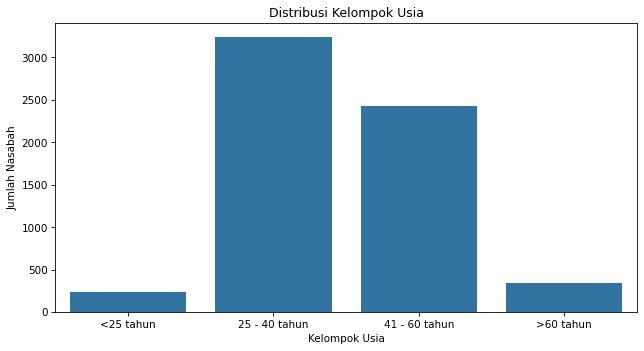

In [43]:
# Membuat visualisasi barplot
plt.figure(figsize=(10, 5), dpi=75)
sns.countplot(data=train, x='bin_age')

# Menambahkan judul dan label
plt.title('Distribusi Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Nasabah')

# Menampilkan plot
plt.show()


| Kelompok Umur | Alasan                                                                                  |
|---------------|-----------------------------------------------------------------------------------------|
| < 25 tahun    | Umumnya memiliki penghasilan terbatas dan cenderung fokus pada kebutuhan konsumtif atau investasi jangka panjang yang belum prioritas.                                    |
| 25 - 40 tahun | Biasanya sedang dalam tahap pengembangan karir dan keluarga, sehingga lebih mungkin memiliki tabungan yang memadai untuk deposito sebagai investasi jangka panjang.|
| 41 - 60 tahun | Umumnya memiliki pendapatan dan simpanan yang stabil, serta fokus pada tujuan keuangan jangka panjang seperti persiapan pensiun atau pendidikan anak.             |
| > 60 tahun    | Biasanya memiliki tabungan yang cukup besar dan lebih memilih investasi yang aman dan stabil untuk memastikan kenyamanan masa pensiun.                                  |


#### Bin_Balance

Saya juga akan mencoba untuk membuat fitur baru yaitu bin_balance dengan mengelompokan saldo calon pelanggan menjadi 5 kelompok yang sama rata berdasarkan nilai quartil.

In [44]:
bin_bal=list(pd.qcut(train['balance'],5).unique().categories)

# Mengubah batas bawah dari interval pertama menjadi -float('inf')
bin_bal[0] = pd.Interval(left=-float('inf'), right=bin_bal[0].right, closed='right')

# Mengubah batas atas dari interval terakhir menjadi float('inf')
bin_bal[-1] = pd.Interval(left=bin_bal[-1].left, right=float('inf'), closed='right')
bin_bal 

[Interval(-inf, 67.0, closed='right'),
 Interval(67.0, 343.6, closed='right'),
 Interval(343.6, 863.0, closed='right'),
 Interval(863.0, 2160.0, closed='right'),
 Interval(2160.0, inf, closed='right')]

In [45]:
# Membuat tepi bin numerik dari bin_bal
bin_bal_edges = [interval.left for interval in bin_bal] + [bin_bal[-1].right]

# Gunakan pd.cut dengan bin numerik
label = [1, 2, 3, 4, 5]
train['bin_balance'] = pd.cut(train['balance'], bins=bin_bal_edges, labels=label)
test['bin_balance'] = pd.cut(test['balance'], bins=bin_bal_edges, labels=label)

# Tampilkan hasilnya
display(train[['balance', 'bin_balance']].head())
display(test[['balance', 'bin_balance']].head())


balance bin_balance
1459      563           3
3231      390           3
2502       69           2
4107     -205           1
3994     -312           1

balance bin_balance
2266     -383           1
7393      608           3
1541     -422           1
1426      128           2
2454     7747           5

In [46]:
display(train["bin_balance"].value_counts())
display(test["bin_balance"].value_counts())

bin_balance
1    1252
3    1250
4    1247
5    1247
2    1244
Name: count, dtype: int64

bin_balance
2    333
1    318
5    317
3    304
4    291
Name: count, dtype: int64

In [47]:
train['bin_balance'] = train['bin_balance'].cat.rename_categories({
    pd.Interval(-np.inf, 71.0, closed='right'): '1',
    pd.Interval(71.0, 341.0, closed='right'): '2',
    pd.Interval(341.0, 849.8, closed='right'): '3',
    pd.Interval(849.8, 2161.0, closed='right'): '4',
    pd.Interval(2161.0, np.inf, closed='right'): '5'
})


test['bin_balance'] = test['bin_balance'].cat.rename_categories({
    pd.Interval(-np.inf, 71.0, closed='right'): '1',
    pd.Interval(71.0, 341.0, closed='right'): '2',
    pd.Interval(341.0, 849.8, closed='right'): '3',
    pd.Interval(849.8, 2161.0, closed='right'): '4',
    pd.Interval(2161.0, np.inf, closed='right'): '5'
})
train.head()

age         job  balance housing loan   contact month  campaign  pdays  \
1459   56  management      563     yes   no  cellular   may         2    168   
3231   32  technician      390     yes   no   unknown   may         1     -1   
2502   30      admin.       69     yes   no  cellular   apr         1     -1   
4107   31    services     -205      no   no  cellular   sep         1    579   
3994   34      admin.     -312     yes   no   unknown   may         1     -1   

     poutcome  deposit        bin_age bin_balance  
1459  failure        0  41 - 60 tahun           3  
3231  unknown        0  25 - 40 tahun           3  
2502  unknown        1  25 - 40 tahun           2  
4107  failure        1  25 - 40 tahun           1  
3994  unknown        0  25 - 40 tahun           1

In [48]:
display(train["bin_balance"].value_counts())
display(test["bin_balance"].value_counts())

bin_balance
1    1252
3    1250
4    1247
5    1247
2    1244
Name: count, dtype: int64

bin_balance
2    333
1    318
5    317
3    304
4    291
Name: count, dtype: int64

#### Bin_pdays

In [49]:
bin_pdays=list(pd.qcut(train['pdays'],10,duplicates='drop').unique().categories)

# Mengubah batas atas dari interval terakhir menjadi float('inf')
bin_pdays[-1] = pd.Interval(left=bin_pdays[-1].left, right=float('inf'), closed='right')
bin_pdays

[Interval(-1.001, 95.0, closed='right'),
 Interval(95.0, 192.0, closed='right'),
 Interval(192.0, inf, closed='right')]

In [50]:
# Membuat tepi bin numerik dari bin_pdays
bin_pdays_edges = [interval.left for interval in bin_pdays] + [bin_pdays[-1].right]

# Gunakan pd.cut dengan bin numerik
train['bin_pdays'] = pd.cut(train['pdays'], bins=bin_pdays_edges)
test['bin_pdays'] = pd.cut(test['pdays'], bins=bin_pdays_edges)

# Tampilkan hasil
display(train[['pdays', 'bin_pdays']].head())
display(test[['pdays', 'bin_pdays']].head())


pdays       bin_pdays
1459    168   (95.0, 192.0]
3231     -1  (-1.001, 95.0]
2502     -1  (-1.001, 95.0]
4107    579    (192.0, inf]
3994     -1  (-1.001, 95.0]

pdays       bin_pdays
2266     -1  (-1.001, 95.0]
7393     -1  (-1.001, 95.0]
1541    329    (192.0, inf]
1426     -1  (-1.001, 95.0]
2454     -1  (-1.001, 95.0]

In [51]:
train['bin_pdays'] = train['bin_pdays'].cat.rename_categories({
    pd.Interval(-1.001, 95.0, closed='right'): '1',
    pd.Interval(95.0, 192.0, closed='right'): '2',
    pd.Interval(192.0, np.inf, closed='right'): '3'
})


test['bin_pdays'] = test['bin_pdays'].cat.rename_categories({
    pd.Interval(-1.001, 95.0, closed='right'): '1',
    pd.Interval(95.0, 192.0, closed='right'): '2',
    pd.Interval(192.0, np.inf, closed='right'): '3'
})
train.head()

age         job  balance housing loan   contact month  campaign  pdays  \
1459   56  management      563     yes   no  cellular   may         2    168   
3231   32  technician      390     yes   no   unknown   may         1     -1   
2502   30      admin.       69     yes   no  cellular   apr         1     -1   
4107   31    services     -205      no   no  cellular   sep         1    579   
3994   34      admin.     -312     yes   no   unknown   may         1     -1   

     poutcome  deposit        bin_age bin_balance bin_pdays  
1459  failure        0  41 - 60 tahun           3         2  
3231  unknown        0  25 - 40 tahun           3         1  
2502  unknown        1  25 - 40 tahun           2         1  
4107  failure        1  25 - 40 tahun           1         3  
3994  unknown        0  25 - 40 tahun           1         1

In [52]:
display(train["bin_balance"].value_counts())
display(test["bin_balance"].value_counts())

bin_balance
1    1252
3    1250
4    1247
5    1247
2    1244
Name: count, dtype: int64

bin_balance
2    333
1    318
5    317
3    304
4    291
Name: count, dtype: int64

#### Bin_pdays

Saya juga akan mencoba untuk membuat fitur baru yaitu bin_pdays dengan mengelompokan lama hari sejak terakhir kali calon pelanggan dihubungi oleh tim Bank ABC menjadi 5 kelompok yang sama rata berdasarkan nilai quartil.

In [53]:
bin_pdays=list(pd.qcut(train['pdays'],10,duplicates='drop').unique().categories)

# Mengubah batas atas dari interval terakhir menjadi float('inf')
bin_pdays[-1] = pd.Interval(left=bin_pdays[-1].left, right=float('inf'), closed='right')
bin_pdays

[Interval(-1.001, 95.0, closed='right'),
 Interval(95.0, 192.0, closed='right'),
 Interval(192.0, inf, closed='right')]

In [54]:
# Membuat bin pdays dari kategori ke nilai batas numerik
bin_pdays_edges = [interval.left for interval in bin_pdays] + [bin_pdays[-1].right]  # Mengonversi interval ke tepi numerik

# Menggunakan pd.cut dengan bin numerik
train['bin_pdays'] = pd.cut(train['pdays'], bins=bin_pdays_edges)
test['bin_pdays'] = pd.cut(test['pdays'], bins=bin_pdays_edges)

# Tampilkan sampel data
display(train.sample(5), test.sample(5))


age            job  balance housing loan   contact month  campaign  \
3649   29  self-employed     2305      no   no  cellular   may         2   
4108   38     management     4335     yes   no  cellular   nov         1   
7759   60        retired      600      no   no  cellular   aug         6   
4218   30       services     -114     yes   no  cellular   jul         2   
1345   58     management      577      no   no   unknown   may         3   

      pdays poutcome  deposit        bin_age bin_balance       bin_pdays  
3649     -1  unknown        0  25 - 40 tahun           5  (-1.001, 95.0]  
4108     -1  unknown        0  25 - 40 tahun           5  (-1.001, 95.0]  
7759     -1  unknown        0  41 - 60 tahun           3  (-1.001, 95.0]  
4218     -1  unknown        0  25 - 40 tahun           1  (-1.001, 95.0]  
1345     -1  unknown        0  41 - 60 tahun           3  (-1.001, 95.0]

age            job  balance housing loan    contact month  campaign  \
5815   26    blue-collar      249     yes   no   cellular   jan         3   
7256   29     management     1445      no   no   cellular   apr         2   
2923   31  self-employed     1815      no   no  telephone   feb         1   
4497   55         admin.      865     yes   no   cellular   jul         1   
5564   51     management      119      no   no    unknown   jun         2   

      pdays poutcome  deposit        bin_age bin_balance       bin_pdays  
5815    262  failure        0  25 - 40 tahun           2    (192.0, inf]  
7256    143  success        1  25 - 40 tahun           4   (95.0, 192.0]  
2923     -1  unknown        1  25 - 40 tahun           4  (-1.001, 95.0]  
4497     82  failure        0  41 - 60 tahun           4  (-1.001, 95.0]  
5564     -1  unknown        0  41 - 60 tahun           2  (-1.001, 95.0]

In [55]:
train['bin_pdays'] = train['bin_pdays'].cat.rename_categories({
    pd.Interval(-1.001, 95.0, closed='right'): '1',
    pd.Interval(95.0, 192.0, closed='right'): '2',
    pd.Interval(192.0, np.inf, closed='right'): '3'
})


test['bin_pdays'] = test['bin_pdays'].cat.rename_categories({
    pd.Interval(-1.001, 95.0, closed='right'): '1',
    pd.Interval(95.0, 192.0, closed='right'): '2',
    pd.Interval(192.0, np.inf, closed='right'): '3'
})
train.head()

age         job  balance housing loan   contact month  campaign  pdays  \
1459   56  management      563     yes   no  cellular   may         2    168   
3231   32  technician      390     yes   no   unknown   may         1     -1   
2502   30      admin.       69     yes   no  cellular   apr         1     -1   
4107   31    services     -205      no   no  cellular   sep         1    579   
3994   34      admin.     -312     yes   no   unknown   may         1     -1   

     poutcome  deposit        bin_age bin_balance bin_pdays  
1459  failure        0  41 - 60 tahun           3         2  
3231  unknown        0  25 - 40 tahun           3         1  
2502  unknown        1  25 - 40 tahun           2         1  
4107  failure        1  25 - 40 tahun           1         3  
3994  unknown        0  25 - 40 tahun           1         1

In [56]:
display(train["bin_pdays"].value_counts())
display(test["bin_pdays"].value_counts())

bin_pdays
1    5008
3     619
2     613
Name: count, dtype: int64

bin_pdays
1    1245
2     163
3     155
Name: count, dtype: int64

In [57]:
bin_column = 'bin_age','bin_balance','bin','bin_pdays'

### Handling Categorical Data

In [58]:
#Melihat unique values pada data train
pd.set_option('display.max_colwidth', None)

columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome']
values = []
nunique_list = []
for i in columns:
    value = train[i].unique()
    nunique = train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

columns  \
0       job   
1   housing   
2      loan   
3   contact   
4     month   
5  poutcome   

                                                                                                                                   values  \
0  [management, technician, admin., services, entrepreneur, student, blue-collar, retired, housemaid, self-employed, unknown, unemployed]   
1                                                                                                                               [yes, no]   
2                                                                                                                               [no, yes]   
3                                                                                                          [cellular, unknown, telephone]   
4                                                                            [may, apr, sep, jun, nov, aug, jul, oct, dec, mar, jan, feb]   
5                                                                                                      [failure, unknown, other, success]   

   nunique  
0       12  
1        2  
2        2  
3        3  
4       12  
5        4

In [59]:
#Melihat unique values pada data train dengan value counts
for i in train.select_dtypes(object).columns:
    display(pd.DataFrame(train[i].value_counts()))

count
job                 
management      1429
blue-collar     1096
technician      1039
admin.           768
services         523
retired          428
self-employed    220
unemployed       196
student          192
entrepreneur     184
housemaid        126
unknown           39

count
housing       
no        3317
yes       2923

count
loan       
no     5411
yes     829

count
contact         
cellular    4503
unknown     1310
telephone    427

count
month       
may     1594
aug      868
jul      816
jun      696
nov      532
apr      517
feb      422
oct      219
jan      182
sep      180
mar      157
dec       57

count
poutcome       
unknown    4640
failure     695
success     606
other       299

Terdapat nilai unknown pada fitur job dan contact pada data train dan berpotensi ada di data test. Maka dari itu, kita akan melakukan encoding data unknown menjadi np.NaN untuk dapat diimpute menggunakan modus pada pipeline model.

Nilai unknown pada data poutcome tidak diperlakukan missing values karena nilai unknown pada kolom poutcome menjelaskan bahwa calon pelanggan tersebut belum pernah dihubungi sebelumnya.

In [60]:
#Encoding data job dan contact yang unknown menjadi nan untuk nanti akan di impute
train["job"] = np.where(train["job"]=="unknown",np.nan,train["job"])
train["contact"] = np.where(train["contact"]=="unknown",np.nan,train["contact"])


test["job"] = np.where(test["job"]=="unknown",np.nan,test["job"])
test["contact"] = np.where(test["contact"]=="unknown",np.nan,test["contact"])


display(train,test)

age         job  balance housing loan   contact month  campaign  pdays  \
1459   56  management      563     yes   no  cellular   may         2    168   
3231   32  technician      390     yes   no       NaN   may         1     -1   
2502   30      admin.       69     yes   no  cellular   apr         1     -1   
4107   31    services     -205      no   no  cellular   sep         1    579   
3994   34      admin.     -312     yes   no       NaN   may         1     -1   
...   ...         ...      ...     ...  ...       ...   ...       ...    ...   
2640   23    services      279     yes   no  cellular   may         1    370   
6831   32  technician      267      no   no  cellular   may         1     -1   
3248   35  technician       33      no   no  cellular   aug         2     -1   
6736   32   housemaid       10     yes   no       NaN   jun         2     -1   
2303   39  management     2193     yes  yes       NaN   jun         3     -1   

     poutcome  deposit        bin_age bin_balance bin_pdays  
1459  failure        0  41 - 60 tahun           3         2  
3231  unknown        0  25 - 40 tahun           3         1  
2502  unknown        1  25 - 40 tahun           2         1  
4107  failure        1  25 - 40 tahun           1         3  
3994  unknown        0  25 - 40 tahun           1         1  
...       ...      ...            ...         ...       ...  
2640  failure        1      <25 tahun           2         3  
6831  unknown        0  25 - 40 tahun           2         1  
3248  unknown        0  25 - 40 tahun           1         1  
6736  unknown        0  25 - 40 tahun           1         1  
2303  unknown        0  25 - 40 tahun           5         1  

[6240 rows x 14 columns]

age          job  balance housing loan   contact month  campaign  pdays  \
2266   32   management     -383     yes   no       NaN   may         1     -1   
7393   37     services      608      no   no  cellular   may         3     -1   
1541   31       admin.     -422     yes   no  cellular   may         2    329   
1426   30  blue-collar      128     yes   no       NaN   may         1     -1   
2454   56   management     7747      no   no       NaN   jun         2     -1   
...   ...          ...      ...     ...  ...       ...   ...       ...    ...   
1229   41   technician       30     yes   no  cellular   jul         1     -1   
592    30   management      398      no   no  cellular   apr         2     -1   
5555   45   management       80      no  yes  cellular   nov         1     -1   
6421   46       admin.     5511      no   no  cellular   jul         2    389   
1693   39     services      410      no   no       NaN   jun         4     -1   

     poutcome  deposit        bin_age bin_balance bin_pdays  
2266  unknown        0  25 - 40 tahun           1         1  
7393  unknown        0  25 - 40 tahun           3         1  
1541    other        0  25 - 40 tahun           1         3  
1426  unknown        0  25 - 40 tahun           2         1  
2454  unknown        0  41 - 60 tahun           5         1  
...       ...      ...            ...         ...       ...  
1229  unknown        0  41 - 60 tahun           1         1  
592   unknown        1  25 - 40 tahun           3         1  
5555  unknown        0  41 - 60 tahun           2         1  
6421  success        1  41 - 60 tahun           5         3  
1693  unknown        0  25 - 40 tahun           3         1  

[1563 rows x 14 columns]

In [61]:
train[train['poutcome']=='unknown']['pdays'].unique()

array([-1], dtype=int64)

In [62]:
#memeriksa jumlah NaN (unknown) values pada tiap kolom
train.isna().sum()/len(train)

age            0.000000
job            0.006250
balance        0.000000
housing        0.000000
loan           0.000000
contact        0.209936
month          0.000000
campaign       0.000000
pdays          0.000000
poutcome       0.000000
deposit        0.000000
bin_age        0.000000
bin_balance    0.000000
bin_pdays      0.000000
dtype: float64

Selain data unknown, terlihat ada kesalahan pengetikan nilai pekerjaan "admin." pada fitur pekerjaan. Maka disini saya akan memperbaiki nilai tersebut menjadi "admin" pada data train dan test

In [63]:
#melakukan penyesuaian nama values 
train["job"] = train["job"].str.replace(".","")
train["job"].unique()

array(['management', 'technician', 'admin', 'services', 'entrepreneur',
       'student', 'blue-collar', 'retired', 'housemaid', 'self-employed',
       nan, 'unemployed'], dtype=object)

In [64]:
#melakukan penyesuaian nama values 
test["job"] = test["job"].str.replace(".","")
test["job"].unique()

array(['management', 'services', 'admin', 'blue-collar', 'technician',
       'retired', 'student', 'self-employed', 'entrepreneur', 'housemaid',
       'unemployed', nan], dtype=object)

# 4. Modeling and Evaluation

Pada bagian ini, data train akan digunakan untuk melatih model dan menggunakan model tersebut untuk memprediksi label pada data test. Langkah - langkah yang dilalui pada tahapan ini adalah:

- Modeling (Default)
Model dibangun dengan pengaturan default untuk mendapatkan hasil awal sebagai baseline kinerja model.

- Modeling (Hyperparameter Tuning)
Dilakukan optimasi dengan hyperparameter tuning untuk menemukan kombinasi parameter terbaik guna meningkatkan kinerja model.

- Modeling (Threshold Adjustment)
Penyesuaian threshold dilakukan untuk mengoptimalkan keputusan model sesuai tujuan bisnis, misalnya, mengurangi false positives atau false negatives.

- Feature Evaluation
Fitur penting dievaluasi untuk melihat mana yang paling mempengaruhi hasil prediksi.

- Rule Based
Penggunaan model berbasis aturan sederhana (rule-based) untuk dibandingkan dengan model prediksi.

- Business Outcome Evaluation - Rule Based vs Model Based
Membandingkan hasil prediksi antara pendekatan rule-based dan model-based untuk menilai efektivitasnya bagi bisnis.

- Model Constraints
Mengevaluasi batasan model, seperti kebutuhan sumber daya atau potensi bias dalam prediksi.

### Modeling (Default)

Pada tahap ini kita akan melakukan modeling tanpa melakukan hyperparameter tuning pada 4 opsi model machine learning yaitu:
- Random forest classifier
- Decision tree classifier
- Logistic regression
- XGBoost

sebelum melakukan pemodelan, kita akan melakukan data preprocessing dengan tahapan sebagai berikut:
1. Memisahkan data train menjadi X_train dan y_train serta test menjadi X_test dan y_test.
2. data numerik akan diimpute median jika ditemukan data NaN baik pada data X_train dan X_test. Kemudian kedua data tersebut akan melalui tahapan robust scalling.
3. data kategorik nominal selain bulan akan diimpute modus jika ditemukan data NaN baik pada data X_train dan X_test. Kemudian data tersebut akan melalui tahapan encoding menggunakan metode One Hot Encoding dengan parameter drop="first"
4. data kategorik ordinal akan melalui tahapan encoding menggunakan metode Ordinal Encoder.
5. Khusus data kategorik nominal bulan akan melalui tahapan encoding mengguankan metode Label Encoder untuk mengurangi jumlah kolom.

Setelah tahapan preprocessing telah dilalui, data akan melalui tahapan modeling menggunakan 4 model yang telah disebutkan sebelumnya.

Model yang terbaik akan dipilih berdasarkan f1 score dan akan digunakan untuk memprediksi nilai pada data X_test. Hasil prediksi tersebut akan menjadi benchmark nilai model sebelum melakukan hyperparameter tuning pada tahapan berikutnya.

Selain itu, pada data test kita akan memeriksa lebih dalam apakah fitur binning yang telah dibuat sebelumnya lebih efektif dalam membantu model melakukan prediksi atau tidak dengan menganalisa features important.

In [65]:
# Importing essential libraries and modules
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer
import category_encoders as ce  # Binary encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  # For imbalanced data handling
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_regression, f_classif
from sklearn.base import BaseEstimator, TransformerMixin

# Models for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Additional utilities
import time


In [66]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
X_train = train.drop("deposit",axis=1)
y_train = train["deposit"]

X_test = test.drop("deposit",axis=1)
y_test = test["deposit"]

In [67]:
# mencari model mana yang lebih baik untuk pemodelan
tree = DecisionTreeClassifier(max_depth=5,random_state=42)
logreg = LogisticRegression(random_state=42, max_iter = 1000)
rf = RandomForestClassifier(max_depth=5,random_state=42)
xgb = XGBClassifier(max_depth=5,random_state=42)

In [68]:
# Encoder for months
class MonthLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_dict = {
            'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(lambda x: x.map(self.label_dict))

    def get_feature_names_out(self, input_features):
        return input_features

# Daftar kolom numerik dan kategorikal
numeric_features = ['balance', 'pdays', 'campaign', 'age']
categorical_features = ['job', 'housing', 'loan', 'contact']
passthrough_features = ['poutcome']  # Kolom 'poutcome' sebelumnya akan di-passthrough

# Preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Updated ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Numerical features
        ('cat', categorical_transformer, categorical_features),  # Categorical features
        ('ordinal_c1', OrdinalEncoder(categories=[['<25 tahun', '25 - 40 tahun', '41 - 60 tahun', '>60 tahun']]), ["bin_age"]),  # Ordinal encoding for age bins
        ('ordinal_c2', OrdinalEncoder(categories=[['1', '2', '3', '4', '5']]), ["bin_balance"]),  # Ordinal encoding for balance bins
        ('ordinal_c3', OrdinalEncoder(categories=[['1', '2', '3']]), ["bin_pdays"]),  # Ordinal encoding for pdays bins
        ('month_encoder', MonthLabelEncoder(), ['month']),  # Month encoding
        ('poutcome_encoder', OneHotEncoder(handle_unknown='ignore'), ['poutcome'])  # OneHotEncoder for 'poutcome'
    ],
    remainder="passthrough"  # Pass through any remaining columns
)


In [69]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ('classifier', RandomForestClassifier())  # Placeholder untuk classifier
])

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42),
                       DecisionTreeClassifier(random_state=42),
                       LogisticRegression(random_state=42),
                       XGBClassifier(random_state=2020)],
    },
]

# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='precision',error_score="raise")

# Measure the fitting time
start_time = time.time()


# Fit GridSearchCV ke data
gscv.fit(X_train, y_train)


end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

Fitting time: 4.47 seconds


In [70]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['balance', 'pdays',
                                                   'campaign', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing...
                                                                              'tahun']]),
                                                  ['bin_age']),
                                                 ('ordinal_c2',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5']]),
                                                  ['bin_balance']),
                                                 ('ordinal_c3',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3']]),
                                                  ['bin_pdays']),
                                                 ('month_encoder',
                                                  MonthLabelEncoder(),
                                                  ['month']),
                                                 ('poutcome_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['poutcome'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [71]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       0.067576      0.007946         0.019980        0.002162   
3       1.033771      0.023407         0.016917        0.001582   
0       0.831072      0.011579         0.053261        0.007003   
1       0.077342      0.003327         0.017363        0.001620   

                                    param_classifier  \
2                LogisticRegression(random_state=42)   
3  XGBClassifier(base_score=None, booster=None, c...   
0            RandomForestClassifier(random_state=42)   
1            DecisionTreeClassifier(random_state=42)   

                                              params  split0_test_score  \
2  {'classifier': LogisticRegression(random_state...           0.688889   
3  {'classifier': XGBClassifier(base_score=None, ...           0.700382   
0  {'classifier': RandomForestClassifier(random_s...           0.669187   
1  {'classifier': DecisionTreeClassifier(random_s...           0.589258   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
2           0.724731           0.697248           0.664078           0.716895   
3           0.732535           0.678295           0.654717           0.673267   
0           0.709804           0.659218           0.678776           0.673745   
1           0.577741           0.576271           0.616608           0.600993   

   mean_test_score  std_test_score  rank_test_score  
2         0.698368        0.021472                1  
3         0.687839        0.026667                2  
0         0.678146        0.017091                3  
1         0.592174        0.015129                4

In [72]:
y_pred=gscv.best_estimator_.predict(X_test)
print('precision_score',precision_score(y_test, y_pred))

precision_score 0.7208121827411168


In [73]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Transform X_train using the transformer
X_train_encoded = transformer.transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

num__balance  num__pdays  num__campaign  num__age  cat__job_admin  \
0        -0.326643    1.071789      -0.195185  1.242916             0.0   
1        -0.388037   -0.484048      -0.586684 -0.774327             0.0   
2        -0.501955   -0.484048      -0.586684 -0.942431             1.0   
3        -0.599193    4.855510      -0.586684 -0.858379             0.0   
4        -0.637166   -0.484048      -0.586684 -0.606224             1.0   
...            ...         ...            ...       ...             ...   
6235     -0.427430    2.931428      -0.586684 -1.530793             0.0   
6236     -0.431688   -0.484048      -0.586684 -0.774327             0.0   
6237     -0.514731   -0.484048      -0.195185 -0.522172             0.0   
6238     -0.522893   -0.484048      -0.195185 -0.774327             0.0   
6239      0.251818   -0.484048       0.196314 -0.185965             0.0   

      cat__job_blue-collar  cat__job_entrepreneur  cat__job_housemaid  \
0                      0.0                    0.0                 0.0   
1                      0.0                    0.0                 0.0   
2                      0.0                    0.0                 0.0   
3                      0.0                    0.0                 0.0   
4                      0.0                    0.0                 0.0   
...                    ...                    ...                 ...   
6235                   0.0                    0.0                 0.0   
6236                   0.0                    0.0                 0.0   
6237                   0.0                    0.0                 0.0   
6238                   0.0                    0.0                 1.0   
6239                   0.0                    0.0                 0.0   

      cat__job_management  cat__job_retired  ...  cat__contact_cellular  \
0                     1.0               0.0  ...                    1.0   
1                     0.0               0.0  ...                    1.0   
2                     0.0               0.0  ...                    1.0   
3                     0.0               0.0  ...                    1.0   
4                     0.0               0.0  ...                    1.0   
...                   ...               ...  ...                    ...   
6235                  0.0               0.0  ...                    1.0   
6236                  0.0               0.0  ...                    1.0   
6237                  0.0               0.0  ...                    1.0   
6238                  0.0               0.0  ...                    1.0   
6239                  1.0               0.0  ...                    1.0   

      cat__contact_telephone  ordinal_c1__bin_age  ordinal_c2__bin_balance  \
0                        0.0                  2.0                      2.0   
1                        0.0                  1.0                      2.0   
2                        0.0                  1.0                      1.0   
3                        0.0                  1.0                      0.0   
4                        0.0                  1.0                      0.0   
...                      ...                  ...                      ...   
6235                     0.0                  0.0                      1.0   
6236                     0.0                  1.0                      1.0   
6237                     0.0                  1.0                      0.0   
6238                     0.0                  1.0                      0.0   
6239                     0.0                  1.0                      4.0   

      ordinal_c3__bin_pdays  month_encoder__month  \
0                       1.0                   5.0   
1                       0.0                   5.0   
2                       0.0                   4.0   
3                       2.0                   9.0   
4                       0.0                   5.0   
...                     ...                   ...   
6235               

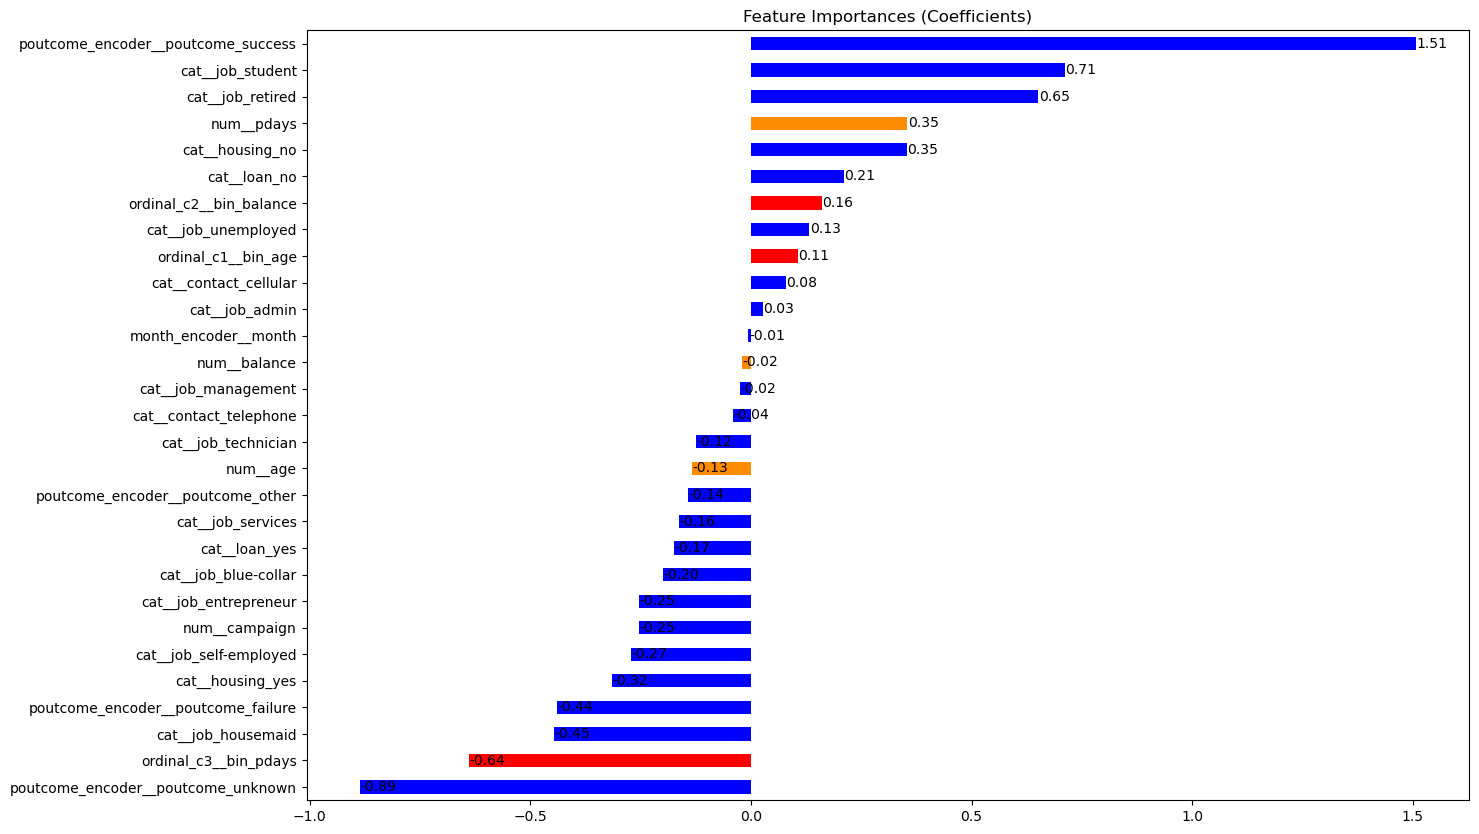

In [74]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Access the final estimator in the pipeline
final_estimator = best_estimator.named_steps['classifier']

# Check if the model has feature_importances_ or coef_
if hasattr(final_estimator, 'feature_importances_'):
    # Get the feature importances from the final estimator
    feature_importances = final_estimator.feature_importances_
elif hasattr(final_estimator, 'coef_'):
    # Get the coefficients for Logistic Regression
    feature_importances = final_estimator.coef_[0]  # Coefficients for each feature (use the first class if it's binary)
else:
    raise AttributeError(f"The model {final_estimator} does not have feature importances or coefficients.")

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Create a Series with feature importances and sort it
model_coef = pd.Series(feature_importances, index=feature_names).sort_values()

# Plot the feature importances

colors = ['darkorange' if feature in ['num__age', 'num__pdays', 'num__balance']
          else 'red' if feature in ['ordinal_c1__bin_age', 'ordinal_c3__bin_pdays', 'ordinal_c2__bin_balance']
          else 'blue' for feature in model_coef.index]

plt.figure(figsize=(15, 10))
ax = model_coef.plot(kind='barh', title='Feature Importances (Coefficients)', color=colors)

# Add annotations to the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  
            i.get_y() + i.get_height() / 2,  
            f'{i.get_width():.2f}',  
            ha='left',  
            va='center')  
plt.show()


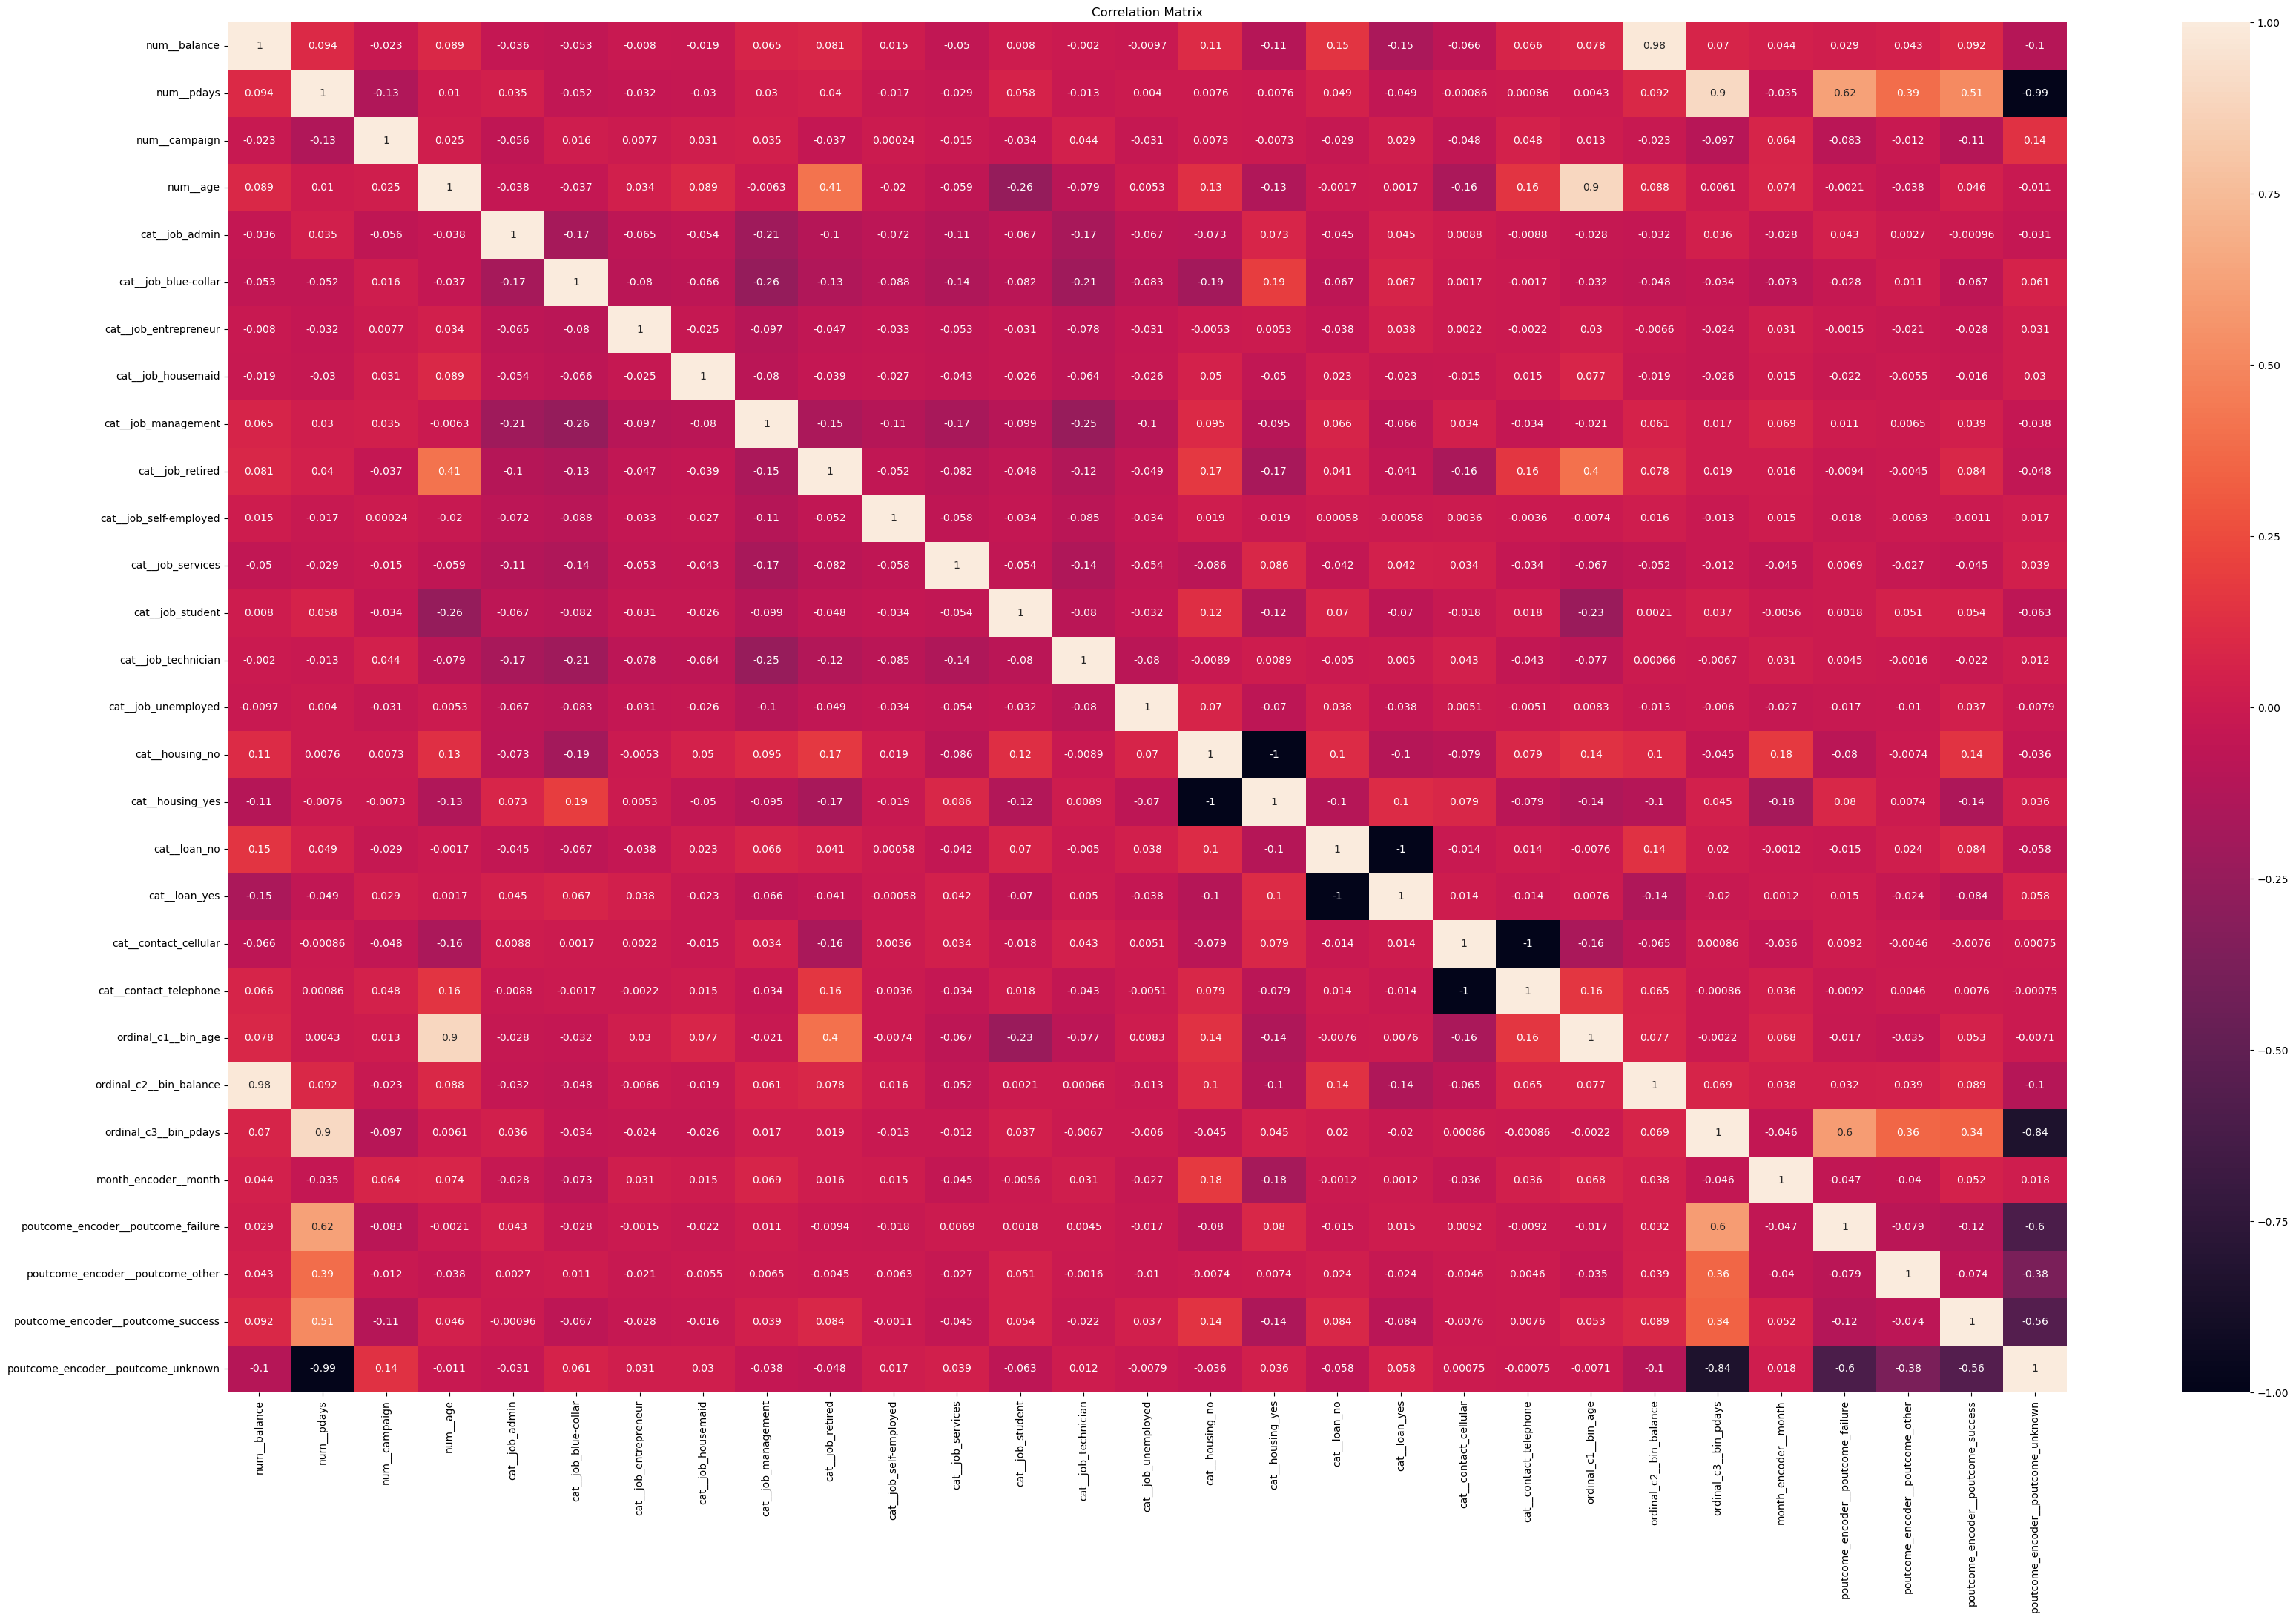

In [75]:
plt.figure(figsize=(40,24))
sns.heatmap(X_train_encoded.corr(method="spearman"),annot=True)
plt.title("Correlation Matrix")
plt.show()

In [76]:
dfcorr=X_train_encoded.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] >= 0.75 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

result

[['num__balance', 'ordinal_c2__bin_balance', 'num__balance'],
 ['num__pdays', 'ordinal_c3__bin_pdays', 'num__pdays'],
 ['num__campaign', 'num__campaign'],
 ['num__age', 'ordinal_c1__bin_age', 'num__age'],
 ['cat__job_admin', 'cat__job_admin'],
 ['cat__job_blue-collar', 'cat__job_blue-collar'],
 ['cat__job_entrepreneur', 'cat__job_entrepreneur'],
 ['cat__job_housemaid', 'cat__job_housemaid'],
 ['cat__job_management', 'cat__job_management'],
 ['cat__job_retired', 'cat__job_retired'],
 ['cat__job_self-employed', 'cat__job_self-employed'],
 ['cat__job_services', 'cat__job_services'],
 ['cat__job_student', 'cat__job_student'],
 ['cat__job_technician', 'cat__job_technician'],
 ['cat__job_unemployed', 'cat__job_unemployed'],
 ['cat__housing_no', 'cat__housing_no'],
 ['cat__housing_yes', 'cat__housing_yes'],
 ['cat__loan_no', 'cat__loan_no'],
 ['cat__loan_yes', 'cat__loan_yes'],
 ['cat__contact_cellular', 'cat__contact_cellular'],
 ['cat__contact_telephone', 'cat__contact_telephone'],
 ['month

Secara model default (tanpa hyperparameter tuning) model Logistic regression memiliki performa precision score tertinggi.

Terdapat korelasi antara fitur:
- ordinal_c1__bin_age dengan num__age
- ordinal_c3__bin_pdays dengan num__pdays
- ordinal_c2__bin_balance dengan num__balance

Grafik feature importance menunjukkan bahwa faktor paling berpengaruh dalam keputusan deposito adalah keberhasilan kampanye sebelumnya (poutcome_success), diikuti oleh status pekerjaan seperti pelajar dan pensiunan. Fitur lain yang cukup penting termasuk jumlah hari sejak kontak terakhir (num_pdays) serta status pelanggan tanpa pinjaman (cat_loan_no) atau hipotek (cat_housing_no). Sebaliknya, hasil kampanye yang tidak diketahui (poutcome_unknown) dan pekerjaan seperti housemaid memiliki pengaruh negatif terhadap keputusan deposito.

Maka kita akan kembali menyesuaikan kolom fitur data train dengan fiture importance yang lebih tinggi dan tanpa multicorrelation.

### Modeling (Hyperparameter Tuning)

Pada tahapan ini, kita akan membuang multicorrelation pada train dan test. Kita akan menjalankan kembali ke 4 opsi model sebelumnya. Namun pada tahapan ini kita akan meningkatkan performa model dengan melakukan penyesuaian hyperparameter tuning, lalu melakukan resamping menggunakan **SMOTE** dan hanya memilih fitur-fitur yang paling bisa memprediksi menggunakan Select K Best.

Kita juga akan sekaligus membandingkan kembali model yang tanpa hyperparameter tuning, namun kali ini tidak ada fitur binning dan hanya terpilih 15 fitur saja yang paling bisa memprediksi menggunakan Select K Best.

Setelah kita menemukan model dengan performam precision score tertinggi, model kita akan tingkaatkan performanya kembali dengan menyesuaikan threshold toleransi probabilitas memprediksi klasifikasi. 

Pada tahapan akhir pemodelan kita akan mengetahui:
- Jenis model, pemilihan parameter, dan penyesuaian threshold yang terbaik dalam memprediksi data test berdasarkan precision score
- Fitur apa saja yang paling mempengaruhi model

In [77]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
X_train = train.drop("deposit",axis=1)
y_train = train["deposit"]

X_test = test.drop("deposit",axis=1)
y_test = test["deposit"]

In [78]:
# Encoder for months
class MonthLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_dict = {
            'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(lambda x: x.map(self.label_dict))

    def get_feature_names_out(self, input_features):
        return input_features

# Daftar kolom numerik dan kategorikal
numeric_features = ['balance', 'pdays', 'campaign', 'age']
categorical_features = ['job', 'housing', 'loan', 'contact']
passthrough_features = ['poutcome']  # Kolom 'poutcome' sebelumnya akan di-passthrough

# Preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Updated ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Numerical features
        ('cat', categorical_transformer, categorical_features),  # Categorical features
        ('ordinal_c1', OrdinalEncoder(categories=[['<25 tahun', '25 - 40 tahun', '41 - 60 tahun', '>60 tahun']]), ["bin_age"]),  # Ordinal encoding for age bins
        ('ordinal_c2', OrdinalEncoder(categories=[['1', '2', '3', '4', '5']]), ["bin_balance"]),  # Ordinal encoding for balance bins
        ('ordinal_c3', OrdinalEncoder(categories=[['1', '2', '3']]), ["bin_pdays"]),  # Ordinal encoding for pdays bins
        ('month_encoder', MonthLabelEncoder(), ['month']),  # Month encoding
        ('poutcome_encoder', OneHotEncoder(handle_unknown='ignore'), ['poutcome'])  # OneHotEncoder for 'poutcome'
    ],
    remainder="passthrough"  # Pass through any remaining columns
)


In [79]:
# Pipeline improved with SMOTE, SelectKBest, and StandardScaler
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Preprocessor dari step sebelumnya (handle missing values, dll.)
    ("smote", SMOTE(random_state=42)),  # Resampling dengan SMOTE
    ("scaler", StandardScaler()),    # Scaling data
    ('feature_selection', SelectKBest(score_func=f_classif)),  # Feature selection with SelectKBest
    ('classifier', RandomForestClassifier())  # Placeholder untuk classifier
])

# Parameter grid untuk hyperparameter tuning
param_grid = [
    {
        'feature_selection__k': [10, 15, 20],  # Menambahkan opsi lebih banyak untuk K
        'classifier': [
            RandomForestClassifier(random_state=42), 
            DecisionTreeClassifier(random_state=42),
            LogisticRegression(random_state=42, max_iter=1000),  # Pastikan max_iter cukup besar untuk konvergensi
            XGBClassifier(random_state=42)
        ], 
    },
    {
        'feature_selection__k': [10, 15, 20],
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__n_estimators': [50, 75, 100],
        'classifier__max_depth': [10, 15, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    {
        'feature_selection__k': [10, 15, 20],
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__max_depth': [10, 15, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    {
        'feature_selection__k': [10, 15, 20],
        'classifier': [LogisticRegression(random_state=42, max_iter=1000)],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    {
        'feature_selection__k': [10, 15, 20],
        'classifier': [XGBClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, 30],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
    }
]

# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='precision')

# Measure the fitting time
start_time = time.time()

# Fit GridSearchCV ke data
gscv.fit(X_train, y_train)

end_time = time.time()
fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

# Menampilkan model terbaik yang dipilih berdasarkan GridSearchCV
print("Best parameters found:", gscv.best_params_)


c:\Users\dzaky\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting time: 337.63 seconds
Best parameters found: {'classifier': RandomForestClassifier(random_state=42), 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50, 'feature_selection__k': 20}


In [80]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['balance', 'pdays',
                                                   'campaign', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing...
                                                  MonthLabelEncoder(),
                                                  ['month']),
                                                 ('poutcome_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['poutcome'])])),
                ('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=20)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=50,
                                        random_state=42))])

In [81]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score").head(15)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
383       0.474275      0.089738         0.034456        0.003026   
707       0.393658      0.018191         0.036436        0.014417   
92        0.586166      0.026412         0.039004        0.004176   
389       0.782195      0.026210         0.041646        0.001639   
713       0.735839      0.062805         0.050486        0.017019   
692       0.612466      0.071617         0.032715        0.002148   
368       0.538799      0.062397         0.032423        0.005690   
689       0.415336      0.036075         0.034957        0.012160   
365       0.409298      0.044763         0.028143        0.001424   
680       0.429293      0.061029         0.031209        0.004567   
356       0.437008      0.044601         0.031470        0.006365   
371       0.756068      0.140101         0.038570        0.001910   
695       0.766112      0.068855         0.037852        0.003813   
65        0.661808      0.072625         0.037961        0.004743   
350       0.590356      0.072937         0.033663        0.004053   

                            param_classifier  param_feature_selection__k  \
383  RandomForestClassifier(random_state=42)                          20   
707  RandomForestClassifier(random_state=42)                          20   
92   RandomForestClassifier(random_state=42)                          20   
389  RandomForestClassifier(random_state=42)                          20   
713  RandomForestClassifier(random_state=42)                          20   
692  RandomForestClassifier(random_state=42)                          20   
368  RandomForestClassifier(random_state=42)                          20   
689  RandomForestClassifier(random_state=42)                          20   
365  RandomForestClassifier(random_state=42)                          20   
680  RandomForestClassifier(random_state=42)                          20   
356  RandomForestClassifier(random_state=42)                          20   
371  RandomForestClassifier(random_state=42)                          20   
695  RandomForestClassifier(random_state=42)                          20   
65   RandomForestClassifier(random_state=42)                          20   
350  RandomForestClassifier(random_state=42)                          20   

    param_classifier__criterion  param_classifier__max_depth  \
383                     entropy                         10.0   
707                    log_loss                         10.0   
92                         gini                         10.0   
389                     entropy                         10.0   
713                    log_loss                         10.0   
692                    log_loss                         10.0   
368                     entropy                         10.0   
689                    log_loss                         10.0   
365                     entropy                         10.0   
680                    log_loss                         10.0   
356                     entropy                         10.0   
371                     entropy                         10.0   
695                    log_loss                         10.0   
65                         gini                         10.0   
350                     entropy                         10.0   

     param_classifier__min_samples_leaf  param_classifier__min_samples_split  \
383                                 2.0                                 10.0   
707                                 2.0                                 10.0   
92                                  4.0                                 10.0   
389                                 2.0                                 10.0   
713                                 2.0                                 10.0   
692                                 2.0                                  2.0   
368                                 2.0                                  2.0   
689               

Model Random Forest Classifier memiliki precision score pada data train yang lebih tinggi yaitu sebesar  0.713245 dengan standard deviation sebesar 0.013674 

Saya akan memilih model random forest classifier dikarenakan precision score yang tinggi.

In [82]:
# Get the mean test scores and corresponding parameters
results = pd.DataFrame(gscv.cv_results_)
results = results.sort_values(by='rank_test_score').reset_index()

second_best_params = results.loc[1, 'params']
second_best_params
# Create a new estimator with the second-best parameters
second_best_estimator = gscv.estimator.set_params(**second_best_params)
second_best_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['balance', 'pdays',
                                                   'campaign', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing...
                                                  MonthLabelEncoder(),
                                                  ['month']),
                                                 ('poutcome_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['poutcome'])])),
                ('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=20)),
                ('classifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=10,
                                        min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=50,
                                        random_state=42))])

In [83]:
# Fit the second best estimator
second_best_estimator.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = second_best_estimator.predict(X_test)

# Menghitung precision score
print('precision_score:', precision_score(y_test, y_pred))


precision_score: 0.735973597359736


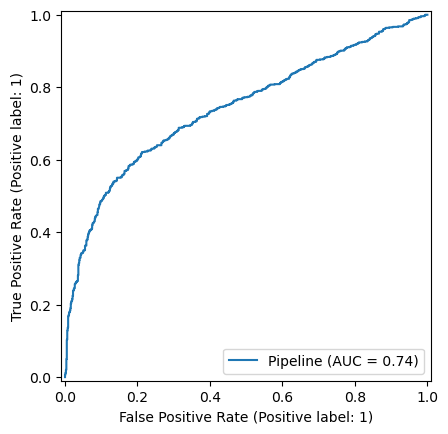

In [84]:
RocCurveDisplay.from_estimator(second_best_estimator,X_test, y_test)


Grafik ROC menunjukkan kemampuan model untuk membedakan antara kelas positif dan negatif. Dengan AUC sebesar 0.74, berarti model memiliki probabilitas 74% untuk membedakan antara kelas positif dan negatif secara benar. Semakin tinggi AUC, semakin baik model dalam memisahkan kedua kelas. Meskipun hasil ini tidak sempurna, nilai AUC sebesar 0.74 menunjukkan bahwa model memiliki kinerja yang cukup baik dalam membedakan antara pelanggan yang akan melakukan deposito dan yang tidak.

In [85]:
model=second_best_estimator
model.fit(X_train,y_train)

th_value=[i/100 for i in range(1,99)]
score=0
score_list=[]

for i in th_value:
    y_prob=model.predict_proba(X_test)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=f1_score(y_test,y_pred)
    score_list.append(score_temp)

th_pr = pd.DataFrame({
    'th_value':th_value,
    "precision_score":score_list
})

th_pr=th_pr.sort_values("precision_score",ascending=False)

In [86]:
th_pr

th_value  precision_score
41      0.42         0.674541
39      0.40         0.673684
40      0.41         0.673443
38      0.39         0.669868
42      0.43         0.669811
..       ...              ...
93      0.94         0.084291
94      0.95         0.039216
95      0.96         0.031537
96      0.97         0.021164
97      0.98         0.010652

[98 rows x 2 columns]

In [87]:
th_pr.head(1)["th_value"].values

array([0.42])

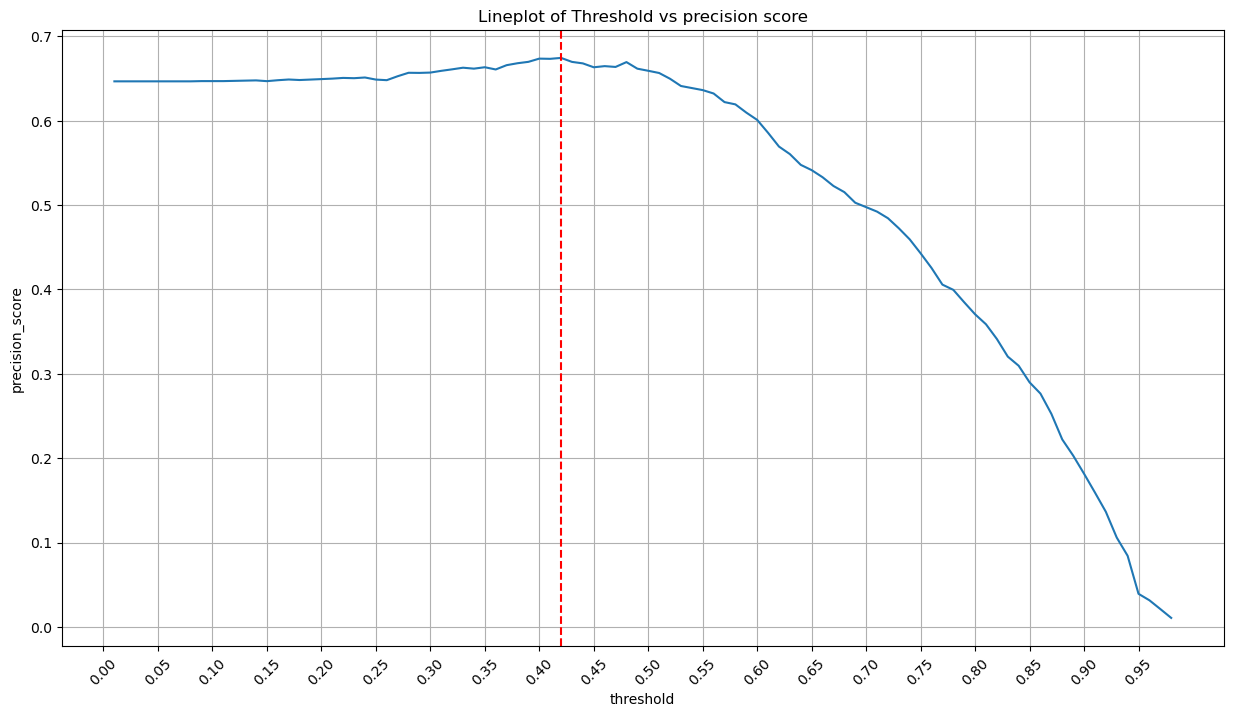

In [88]:
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.ylabel("precision_score")
plt.xlabel("threshold")
plt.title("Lineplot of Threshold vs precision score")
plt.axvline(x=th_pr.head(1)["th_value"].values, linestyle='--',color='red')
plt.show()

In [89]:
y_prob=model.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>th_pr.head(1)["th_value"].values,1,0)

In [90]:
final_model_actual_pred_y = pd.DataFrame({
    "actual":y_test,
    "pred":y_pred
})
final_model_actual_pred_y 

actual  pred
0          0     0
1          0     1
2          0     0
3          0     0
4          0     1
...      ...   ...
1558       0     0
1559       1     1
1560       0     0
1561       1     1
1562       0     1

[1563 rows x 2 columns]

In [91]:
confusion_matrix_final= final_model_actual_pred_y.groupby("actual")["pred"].value_counts().reset_index()
confusion_matrix_final

actual  pred  count
0       0     0    553
1       0     1    263
2       1     1    514
3       1     0    233

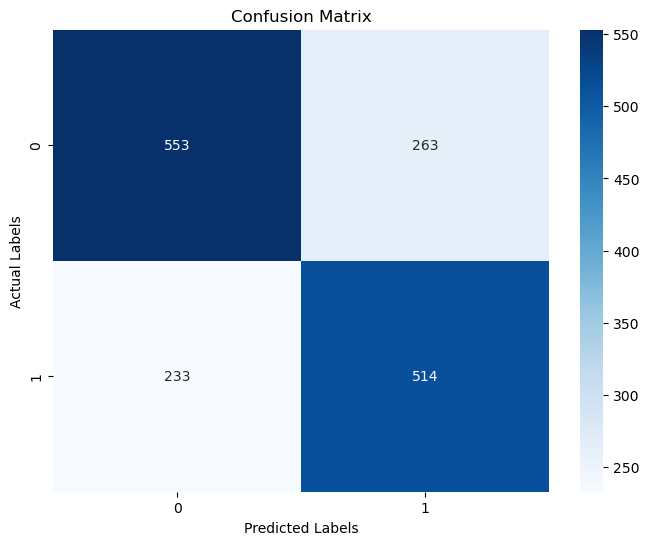

In [92]:

confusion_matrix_pivot = confusion_matrix_final.pivot(index='actual', columns='pred', values='count')


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_pivot, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


 Dari hasil tuning, threshold optimal ditemukan di sekitar 42% dengan nilai precision score sebesar 0.67. Threshold ini menunjukkan bahwa jika probabilitas prediksi dari model lebih dari 42%, maka data tersebut akan diprediksi sebagai positif (melakukan deposit). Gambar kedua menunjukkan bagaimana precision score cenderung meningkat hingga threshold sekitar 42%, setelah itu terjadi penurunan tajam, menandakan threshold tersebut adalah pilihan yang optimal.

Dari confusion matrix ini, kita dapat melihat bahwa model mampu memprediksi dengan benar 553 kasus negatif (True Negatives) dan 514 kasus positif (True Positives). Namun, terdapat 263 False Positives dan 233 False Negatives, yang menunjukkan bahwa model masih melakukan kesalahan dalam memprediksi beberapa pelanggan yang tidak akan melakukan deposit. 

In [93]:
y_pred_train=gscv.best_estimator_.predict(X_train)
y_pred_test=gscv.best_estimator_.predict(X_test)

print('Train')
print(classification_report(y_train,y_pred_train))
print('Test')
print(classification_report(y_test,y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      3259
           1       0.75      0.60      0.66      2981

    accuracy                           0.71      6240
   macro avg       0.72      0.71      0.70      6240
weighted avg       0.72      0.71      0.71      6240

Test
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       816
           1       0.74      0.60      0.66       747

    accuracy                           0.71      1563
   macro avg       0.71      0.70      0.70      1563
weighted avg       0.71      0.71      0.70      1563



Train Set: Model memiliki performa yang cukup baik dengan nilai accuracy sebesar 0.71, precision sebesar 0.72, recall sebesar 0.71, dan f1-score sebesar 0.71. Untuk kelas negatif (0), precision sebesar 0.69 dan recall sebesar 0.81 menunjukkan bahwa model cukup baik dalam memprediksi pelanggan yang tidak akan melakukan deposit, dengan sedikit kesalahan dalam memprediksi False Negatives. Untuk kelas positif (1), precision sebesar 0.75 dan recall sebesar 0.56 menunjukkan bahwa model mampu memprediksi pelanggan yang akan melakukan deposit, meskipun terdapat kesalahan yang lebih banyak pada prediksi False Positives.

Test Set: Pada data test, hasil yang didapat cukup serupa dengan train set, yang menunjukkan bahwa model tidak mengalami overfitting. Accuracy tetap di angka 0.71, dengan precision dan recall masing-masing sebesar 0.71. Untuk kelas negatif (0), precision sebesar 0.69 dan recall sebesar 0.80, sementara untuk kelas positif (1), precision sebesar 0.74 dan recall sebesar 0.60. Ini menunjukkan bahwa model tetap menjaga keseimbangan antara presisi dan recall pada data test, meskipun sedikit lebih lemah dalam mendeteksi kelas positif (deposit).

Secara keseluruhan, model ini memiliki keseimbangan performa antara precision dan recall, yang cukup baik untuk memprediksi apakah seorang pelanggan akan melakukan deposit atau tidak.

### Feature Evaluation

In [94]:
# Get the best estimator from GridSearchCV
best_estimator = second_best_estimator

# Get the SelectKBest transformer
select_k_best = best_estimator.named_steps['feature_selection']

# Get the selected features indices
selected_indices = select_k_best.get_support(indices=True)


# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Transform X_train using the transformer
X_test_encoded = transformer.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)


# Get the column names of the selected features
selected_features = X_test_encoded.columns[selected_indices]
selected_features

Index(['num__balance', 'num__pdays', 'num__campaign', 'num__age',
       'cat__job_blue-collar', 'cat__job_management', 'cat__job_retired',
       'cat__job_services', 'cat__job_student', 'cat__job_unemployed',
       'cat__housing_no', 'cat__housing_yes', 'cat__loan_no', 'cat__loan_yes',
       'ordinal_c1__bin_age', 'ordinal_c2__bin_balance',
       'ordinal_c3__bin_pdays', 'poutcome_encoder__poutcome_other',
       'poutcome_encoder__poutcome_success',
       'poutcome_encoder__poutcome_unknown'],
      dtype='object')

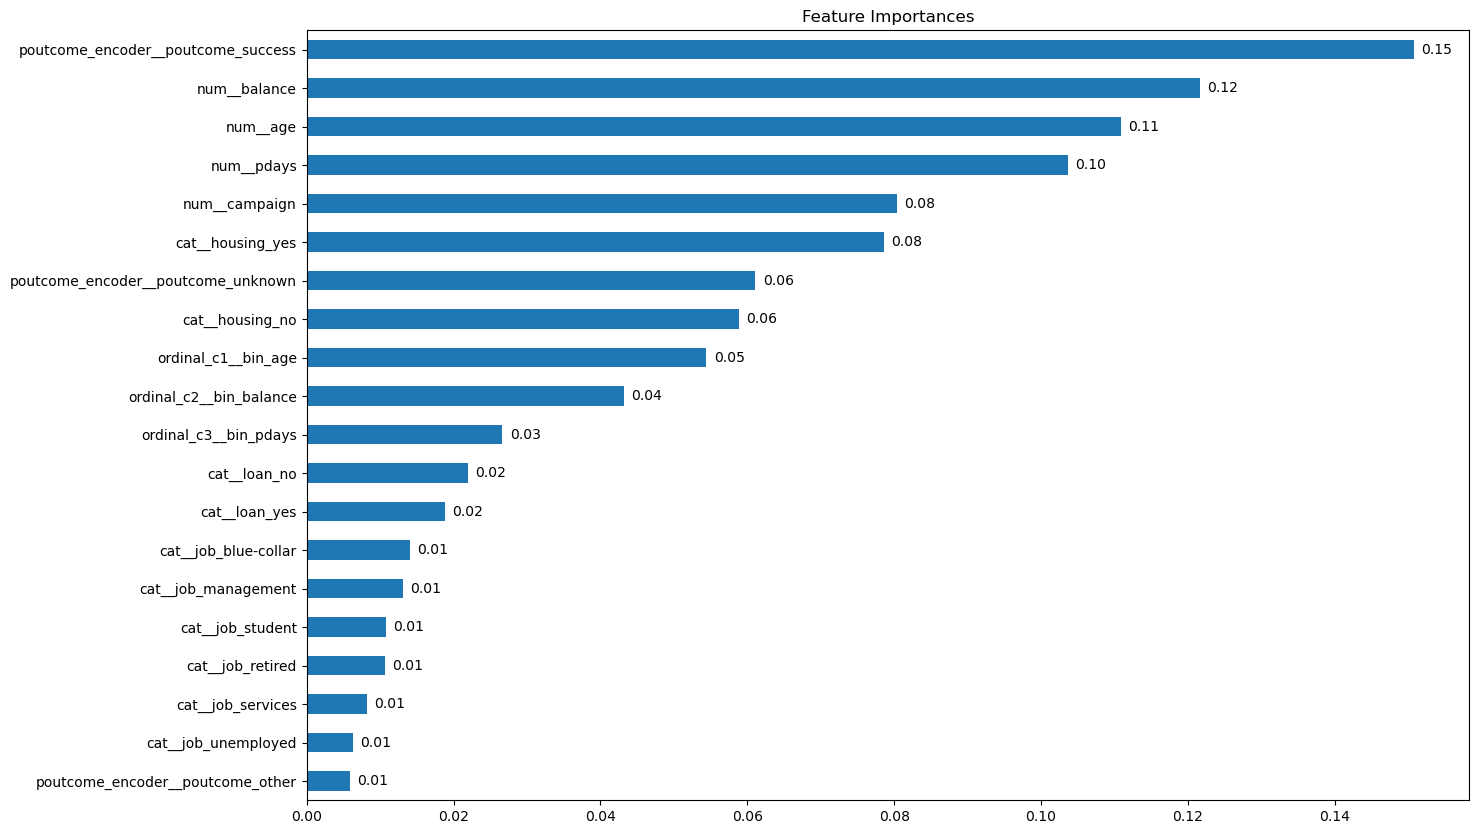

In [95]:
# Get the best estimator from GridSearchCV
best_estimator = second_best_estimator

# Access the final estimator in the pipeline
final_estimator = best_estimator.named_steps['classifier']

# Get the feature importances from the final estimator
feature_importances = final_estimator.feature_importances_

# Create a Series with feature importances and sort it
model_coef = pd.Series(feature_importances, index=selected_features).sort_values()

# Plot the feature importances
plt.figure(figsize=(15, 10))
ax = model_coef.plot(kind='barh', title='Feature Importances')

# Add annotations to the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  # position x (at the end of the bar)
            i.get_y() + i.get_height() / 2,  # position y (middle of the bar)
            f'{i.get_width():.2f}',  # text to display (feature importance value)
            ha='left',  # horizontal alignment (left align)
            va='center')  # vertical alignment (center align)
plt.show()


1. Kesuksesan kampanye sebelumnya (poutcome_success) memiliki pengaruh terbesar dengan koefisien sekitar 0.19. Ini menunjukkan bahwa keberhasilan kampanye sebelumnya sangat relevan dalam menentukan apakah calon pelanggan akan melakukan deposit.

2. Jumlah hari sejak terakhir kali pelanggan dihubungi (num_pdays) juga memberikan pengaruh yang signifikan dengan nilai 0.17, menandakan bahwa semakin dekat jarak waktu sejak terakhir kali dihubungi, semakin besar kemungkinan calon pelanggan untuk melakukan deposit.

3. Jumlah interaksi (num_campaign), yang menunjukkan seberapa sering pelanggan dihubungi selama kampanye, memiliki nilai pengaruh sekitar 0.13, yang menunjukkan bahwa frekuensi interaksi penting.

4. Saldo rekening (ordinal_c2_bin_balance) dan status kampanye sebelumnya yang tidak diketahui (poutcome_unknown) juga memiliki pengaruh yang cukup besar dengan masing-masing nilai 0.11 dan 0.09, menunjukkan bahwa saldo rekening dan informasi yang tidak diketahui terkait kampanye sebelumnya mempengaruhi keputusan pelanggan.

5. Fitur lainnya, seperti kepemilikan pinjaman rumah (housing), pinjaman dana (loan), dan jenis pekerjaan (job) memberikan pengaruh yang lebih kecil namun tetap relevan.

In [96]:
#impute fitur contact yang NaN dengan modus karena jumlah NaN values dibawah 50%
train["contact"].fillna(train["contact"].mode()[0],inplace=True)
train["job"].fillna(train["job"].mode()[0],inplace=True)
train.isna().sum()/len(train)

age            0.0
job            0.0
balance        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
campaign       0.0
pdays          0.0
poutcome       0.0
deposit        0.0
bin_age        0.0
bin_balance    0.0
bin_pdays      0.0
dtype: float64

In [97]:
group_bin_age = train.groupby("bin_age")["deposit"].value_counts(normalize=True).reset_index()
group_bin_age = group_bin_age[group_bin_age["deposit"]==1].drop("deposit",axis=1)
group_bin_age

C:\Users\dzaky\AppData\Local\Temp\ipykernel_25480\795965445.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_bin_age = train.groupby("bin_age")["deposit"].value_counts(normalize=True).reset_index()


bin_age  proportion
0      <25 tahun    0.702929
3  25 - 40 tahun    0.456287
5  41 - 60 tahun    0.433292
6      >60 tahun    0.836735

In [98]:
group_bin_bal = train.groupby("bin_balance")["deposit"].value_counts(normalize=True).reset_index()
group_bin_bal = group_bin_bal[group_bin_bal["deposit"]==1].drop("deposit",axis=1)
group_bin_bal

C:\Users\dzaky\AppData\Local\Temp\ipykernel_25480\3692921917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_bin_bal = train.groupby("bin_balance")["deposit"].value_counts(normalize=True).reset_index()


bin_balance  proportion
1           1    0.354633
3           2    0.456592
5           3    0.472000
6           4    0.520449
8           5    0.585405

In [99]:
group_poutcome = train.groupby("poutcome")["deposit"].value_counts(normalize=True).reset_index()
group_poutcome = group_poutcome[group_poutcome["deposit"]==1].drop("deposit",axis=1)
group_poutcome

poutcome  proportion
0  failure    0.500719
2    other    0.588629
4  success    0.910891
7  unknown    0.410560

In [100]:
group_job = train.groupby("job")["deposit"].value_counts(normalize=True).reset_index()
group_job = group_job[group_job["deposit"]==1].drop("deposit",axis=1)
group_job

job  proportion
1           admin    0.477865
3     blue-collar    0.384124
5    entrepreneur    0.391304
7       housemaid    0.373016
8      management    0.510899
10        retired    0.686916
13  self-employed    0.436364
15       services    0.397706
16        student    0.755208
19     technician    0.450433
20     unemployed    0.576531

In [101]:
group_month = train.groupby("month")["deposit"].value_counts(normalize=True).reset_index()
group_month = group_month[group_month["deposit"]==1].drop("deposit",axis=1)
group_month

month  proportion
0    apr    0.618956
3    aug    0.468894
4    dec    0.894737
6    feb    0.561611
9    jan    0.456044
11   jul    0.414216
13   jun    0.456897
14   mar    0.872611
17   may    0.332497
19   nov    0.426692
20   oct    0.831050
22   sep    0.838889

In [102]:
group_contact = train.groupby("contact")["deposit"].value_counts(normalize=True).reset_index()
group_contact = group_contact[group_contact["deposit"]==1].drop("deposit",axis=1)
group_contact

contact  proportion
1   cellular    0.476690
3  telephone    0.491803

In [103]:
group_housing = train.groupby("housing")["deposit"].value_counts(normalize=True).reset_index()
group_housing = group_housing[group_housing["deposit"]==1].drop("deposit",axis=1)
group_housing

housing  proportion
0      no    0.576726
3     yes    0.365378

In [104]:
group_loan = train.groupby("loan")["deposit"].value_counts(normalize=True).reset_index()
group_loan = group_loan[group_loan["deposit"]==1].drop("deposit",axis=1)
group_loan

loan  proportion
0   no    0.501201
3  yes    0.324487

In [105]:
group_bin_pdays = train.groupby("bin_pdays")["deposit"].value_counts(normalize=True).reset_index()
group_bin_pdays = group_bin_pdays[group_bin_pdays["deposit"]==1].drop("deposit",axis=1)
group_bin_pdays

C:\Users\dzaky\AppData\Local\Temp\ipykernel_25480\3826825680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_bin_pdays = train.groupby("bin_pdays")["deposit"].value_counts(normalize=True).reset_index()


bin_pdays  proportion
1         1    0.440695
2         2    0.724307
4         3    0.533118

In [106]:
plt.figure(figsize=(28,30))

# Gunakan viridis sebagai skema warna
color = sns.color_palette("viridis", as_cmap=True)

plt.subplot(3,3,1)
plt.title("Barplot Deposit by Bin Age")
sns.barplot(group_bin_age, x="bin_age", y="proportion", color=color(0.5)) 

plt.subplot(3,3,2)
plt.title("Barplot Deposit by Poutcome")
sns.barplot(group_poutcome, x="poutcome", y="proportion", color=color(0.6))

plt.subplot(3,3,3)
plt.title("Barplot Deposit by Job")
sns.barplot(group_job, y="job", x="proportion", color=color(0.7))

plt.subplot(3,3,4)
plt.title("Barplot Deposit by Month")
sns.barplot(group_month, x="month", y="proportion", color=color(0.8))

plt.subplot(3,3,5)
plt.title("Barplot Deposit by Contact")
sns.barplot(group_contact, x="contact", y="proportion", color=color(0.4))

plt.subplot(3,3,6)
plt.title("Barplot Deposit by Housing")
sns.barplot(group_housing, x="housing", y="proportion", color=color(0.3))

plt.subplot(3,3,7)
plt.title("Barplot Deposit by Loan")
sns.barplot(group_loan, x="loan", y="proportion", color=color(0.2))

plt.subplot(3,3,8)
plt.title("Barplot Deposit by Bin Balance")
sns.barplot(group_bin_bal, x="bin_balance", y="proportion", color=color(0.1))

plt.subplot(3,3,9)
plt.title("Barplot Deposit by Bin Pdays")
sns.barplot(group_bin_pdays, x="bin_pdays", y="proportion", color=color(0.9))

plt.show()


In [107]:
# Transform X_train using the transformer
X_train_encoded = transformer.transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

num__balance  num__pdays  num__campaign  num__age  cat__job_admin  \
0        -0.326643    1.071789      -0.195185  1.242916             0.0   
1        -0.388037   -0.484048      -0.586684 -0.774327             0.0   
2        -0.501955   -0.484048      -0.586684 -0.942431             1.0   
3        -0.599193    4.855510      -0.586684 -0.858379             0.0   
4        -0.637166   -0.484048      -0.586684 -0.606224             1.0   
...            ...         ...            ...       ...             ...   
6235     -0.427430    2.931428      -0.586684 -1.530793             0.0   
6236     -0.431688   -0.484048      -0.586684 -0.774327             0.0   
6237     -0.514731   -0.484048      -0.195185 -0.522172             0.0   
6238     -0.522893   -0.484048      -0.195185 -0.774327             0.0   
6239      0.251818   -0.484048       0.196314 -0.185965             0.0   

      cat__job_blue-collar  cat__job_entrepreneur  cat__job_housemaid  \
0                      0.0                    0.0                 0.0   
1                      0.0                    0.0                 0.0   
2                      0.0                    0.0                 0.0   
3                      0.0                    0.0                 0.0   
4                      0.0                    0.0                 0.0   
...                    ...                    ...                 ...   
6235                   0.0                    0.0                 0.0   
6236                   0.0                    0.0                 0.0   
6237                   0.0                    0.0                 0.0   
6238                   0.0                    0.0                 1.0   
6239                   0.0                    0.0                 0.0   

      cat__job_management  cat__job_retired  ...  cat__contact_cellular  \
0                     1.0               0.0  ...                    1.0   
1                     0.0               0.0  ...                    1.0   
2                     0.0               0.0  ...                    1.0   
3                     0.0               0.0  ...                    1.0   
4                     0.0               0.0  ...                    1.0   
...                   ...               ...  ...                    ...   
6235                  0.0               0.0  ...                    1.0   
6236                  0.0               0.0  ...                    1.0   
6237                  0.0               0.0  ...                    1.0   
6238                  0.0               0.0  ...                    1.0   
6239                  1.0               0.0  ...                    1.0   

      cat__contact_telephone  ordinal_c1__bin_age  ordinal_c2__bin_balance  \
0                        0.0                  2.0                      2.0   
1                        0.0                  1.0                      2.0   
2                        0.0                  1.0                      1.0   
3                        0.0                  1.0                      0.0   
4                        0.0                  1.0                      0.0   
...                      ...                  ...                      ...   
6235                     0.0                  0.0                      1.0   
6236                     0.0                  1.0                      1.0   
6237                     0.0                  1.0                      0.0   
6238                     0.0                  1.0                      0.0   
6239                     0.0                  1.0                      4.0   

      ordinal_c3__bin_pdays  month_encoder__month  \
0                       1.0                   5.0   
1                       0.0                   5.0   
2                       0.0                   4.0   
3                       2.0                   9.0   
4                       0.0                   5.0   
...                     ...                   ...   
6235               

In [108]:
score = []
for i in X_train_encoded.columns:
    correlation = X_train_encoded[i].corr(y_train)
    score.append(correlation)

result = pd.DataFrame({
    "feature importance":X_train_encoded.columns,
    "correlation":score
}).sort_values("correlation")

result=result[result['feature importance'].isin(selected_features)]

plt.figure(figsize=(10,9))
plt.title("Feature Importance Correlation to Label")
sns.barplot(result, y="feature importance", x="correlation")

for index, value in enumerate(result["correlation"]):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")
    
plt.show()

1. Kesuksesan Kampanye Sebelumnya: Pelanggan yang berhasil menerima tawaran dalam kampanye pemasaran sebelumnya memiliki kemungkinan lebih tinggi untuk melakukan deposit pada kampanye selanjutnya, yang terlihat dari tingginya pentingnya fitur poutcome_success.

2. Lama Hari Terakhir Pelanggan Dihubungi (pdays): Semakin lama pelanggan terakhir dihubungi sejak kampanye sebelumnya, semakin besar kecenderungan pelanggan untuk melakukan deposit. Ini mengindikasikan bahwa pelanggan yang lama tidak dihubungi mungkin lebih responsif terhadap tawaran baru.

3. Frekuensi Penghubungan (campaign): Semakin sering pelanggan dihubungi dalam suatu kampanye, justru kecenderungan untuk melakukan deposit menurun, yang mungkin disebabkan oleh efek kejenuhan atau overload dari kampanye.

4. Saldo dan Status Keuangan: Pelanggan dengan saldo yang lebih besar atau yang tidak memiliki pinjaman rumah (housing_no) memiliki kecenderungan yang lebih tinggi untuk melakukan deposit, mencerminkan bahwa stabilitas finansial dapat mendorong mereka untuk menabung lebih banyak.

5. Status Pinjaman dan Pekerjaan: Pelanggan yang tidak memiliki pinjaman dana (loan_no) atau bekerja di sektor tertentu (misalnya, blue-collar dan student) menunjukkan kecenderungan untuk melakukan deposit, yang menyoroti hubungan antara status keuangan dan keputusan investasi.

6. Daftar Calon Pelanggan Baru: Fitur poutcome_unknown menunjukkan bahwa pelanggan yang belum pernah dihubungi sebelumnya cenderung tidak melakukan deposit, yang mengindikasikan bahwa pelanggan baru mungkin memerlukan pendekatan yang berbeda.

### Rule Based

Rule Based merupakan pendekatan dalam sistem pengambilan keputusan yang mengandalkan serangkaian aturan untuk memprediksi atau mengklasifikasikan data.

Dalam pendekatan ini, setiap aturan memberikan skor untuk masing-masing variabel atau fitur. Pada kasus ini, bank XXX menetapkan skor berdasarkan persentase pelanggan yang melakukan deposit di setiap kategori fitur dalam dataset. Skor dari setiap fitur kemudian dijumlahkan untuk menghasilkan total skor keseluruhan. Jika total skor ini melebihi rata-rata total skor dari data pelatihan, maka pelanggan diprediksi akan melakukan deposit.













In [109]:
# Scorecard modeling

#bin_age
rule_based_test = pd.merge(test, group_bin_age, on='bin_age', how='inner').rename(columns={"proportion":"score_bin_age"})

#poutcome
rule_based_test = pd.merge(rule_based_test, group_poutcome, on='poutcome', how='inner').rename(columns={"proportion":"score_poutcome"})

#job
rule_based_test = pd.merge(rule_based_test, group_job, on='job', how='inner').rename(columns={"proportion":"score_job"})

#month
rule_based_test = pd.merge(rule_based_test, group_month, on='month', how='inner').rename(columns={"proportion":"score_month"})

#contact
rule_based_test = pd.merge(rule_based_test, group_contact, on='contact', how='inner').rename(columns={"proportion":"score_contact"})

#housing
rule_based_test = pd.merge(rule_based_test, group_housing, on='housing', how='inner').rename(columns={"proportion":"score_housing"})

#loan
rule_based_test = pd.merge(rule_based_test, group_loan, on='loan', how='inner').rename(columns={"proportion":"score_loan"})

#bin_balance
rule_based_test = pd.merge(rule_based_test, group_bin_bal, on='bin_balance', how='inner').rename(columns={"proportion":"score_bin_balance"})

#bin_pdays
rule_based_test = pd.merge(rule_based_test, group_bin_pdays, on='bin_pdays', how='inner').rename(columns={"proportion":"score_bin_pdays"})

rule_based_test = rule_based_test.iloc[:,14:]
rule_based_test["total_score"] = rule_based_test.sum(axis=1)
rule_based_test

score_bin_age  score_poutcome  score_job  score_month  score_contact  \
0          0.456287        0.410560   0.510899     0.332497       0.476690   
1          0.456287        0.410560   0.510899     0.332497       0.476690   
2          0.456287        0.410560   0.510899     0.332497       0.476690   
3          0.456287        0.410560   0.397706     0.332497       0.476690   
4          0.433292        0.410560   0.397706     0.332497       0.476690   
...             ...             ...        ...          ...            ...   
1219       0.433292        0.910891   0.384124     0.426692       0.476690   
1220       0.456287        0.500719   0.510899     0.414216       0.491803   
1221       0.433292        0.500719   0.477865     0.561611       0.476690   
1222       0.456287        0.500719   0.397706     0.456044       0.476690   
1223       0.456287        0.500719   0.477865     0.838889       0.476690   

      score_housing  score_loan  score_bin_balance  score_bin_pdays  \
0          0.576726    0.501201           0.472000         0.440695   
1          0.576726    0.501201           0.472000         0.440695   
2          0.576726    0.501201           0.472000         0.440695   
3          0.576726    0.501201           0.472000         0.440695   
4          0.576726    0.501201           0.472000         0.440695   
...             ...         ...                ...              ...   
1219       0.365378    0.501201           0.520449         0.533118   
1220       0.365378    0.501201           0.520449         0.533118   
1221       0.365378    0.324487           0.520449         0.533118   
1222       0.365378    0.324487           0.520449         0.533118   
1223       0.365378    0.324487           0.520449         0.533118   

      total_score  
0        4.177555  
1        4.177555  
2        4.177555  
3        4.064362  
4        4.041367  
...           ...  
1219     4.551835  
1220     4.294071  
1221     4.193610  
1222     4.030878  
1223     4.493882  

[1224 rows x 10 columns]

In [110]:
# Scorecard modeling

#bin_age
rule_based_train = pd.merge(train, group_bin_age, on='bin_age', how='inner').rename(columns={"proportion":"score_bin_age"})

#poutcome
rule_based_train = pd.merge(rule_based_train, group_poutcome, on='poutcome', how='inner').rename(columns={"proportion":"score_poutcome"})

#job
rule_based_train = pd.merge(rule_based_train, group_job, on='job', how='inner').rename(columns={"proportion":"score_job"})

#month
rule_based_train = pd.merge(rule_based_train, group_month, on='month', how='inner').rename(columns={"proportion":"score_month"})

#contact
rule_based_train = pd.merge(rule_based_train, group_contact, on='contact', how='inner').rename(columns={"proportion":"score_contact"})

#housing
rule_based_train = pd.merge(rule_based_train, group_housing, on='housing', how='inner').rename(columns={"proportion":"score_housing"})

#loan
rule_based_train = pd.merge(rule_based_train, group_loan, on='loan', how='inner').rename(columns={"proportion":"score_loan"})

#bin_balance
rule_based_train = pd.merge(rule_based_train, group_bin_bal, on='bin_balance', how='inner').rename(columns={"proportion":"score_bin_balance"})

#bin_pdays
rule_based_train = pd.merge(rule_based_train, group_bin_pdays, on='bin_pdays', how='inner').rename(columns={"proportion":"score_bin_pdays"})

rule_based_train = rule_based_train.iloc[:,14:]
rule_based_train["total_score"] = rule_based_train.sum(axis=1)
rule_based_train

score_bin_age  score_poutcome  score_job  score_month  score_contact  \
0          0.433292        0.500719   0.510899     0.332497       0.476690   
1          0.456287        0.500719   0.510899     0.332497       0.476690   
2          0.433292        0.588629   0.510899     0.332497       0.476690   
3          0.456287        0.588629   0.510899     0.332497       0.476690   
4          0.433292        0.500719   0.686916     0.332497       0.476690   
...             ...             ...        ...          ...            ...   
6235       0.456287        0.588629   0.384124     0.332497       0.491803   
6236       0.456287        0.500719   0.510899     0.561611       0.476690   
6237       0.456287        0.588629   0.510899     0.561611       0.476690   
6238       0.433292        0.588629   0.450433     0.561611       0.476690   
6239       0.456287        0.588629   0.450433     0.456044       0.476690   

      score_housing  score_loan  score_bin_balance  score_bin_pdays  \
0          0.365378    0.501201           0.472000         0.724307   
1          0.365378    0.501201           0.472000         0.724307   
2          0.365378    0.501201           0.472000         0.724307   
3          0.365378    0.501201           0.472000         0.724307   
4          0.365378    0.501201           0.472000         0.724307   
...             ...         ...                ...              ...   
6235       0.365378    0.324487           0.456592         0.533118   
6236       0.576726    0.324487           0.456592         0.533118   
6237       0.576726    0.324487           0.456592         0.533118   
6238       0.576726    0.324487           0.456592         0.533118   
6239       0.576726    0.324487           0.456592         0.533118   

      total_score  
0        4.316984  
1        4.339978  
2        4.404893  
3        4.427888  
4        4.493000  
...           ...  
6235     3.932915  
6236     4.397130  
6237     4.485039  
6238     4.401578  
6239     4.319006  

[6240 rows x 10 columns]

In [111]:
rule_based_train["total_score"].mean()

4.2995192307692305

In [112]:
rule_based_test["pred"]=np.where(rule_based_test["total_score"] <= rule_based_train["total_score"].mean(),0,1)
rule_based_test

score_bin_age  score_poutcome  score_job  score_month  score_contact  \
0          0.456287        0.410560   0.510899     0.332497       0.476690   
1          0.456287        0.410560   0.510899     0.332497       0.476690   
2          0.456287        0.410560   0.510899     0.332497       0.476690   
3          0.456287        0.410560   0.397706     0.332497       0.476690   
4          0.433292        0.410560   0.397706     0.332497       0.476690   
...             ...             ...        ...          ...            ...   
1219       0.433292        0.910891   0.384124     0.426692       0.476690   
1220       0.456287        0.500719   0.510899     0.414216       0.491803   
1221       0.433292        0.500719   0.477865     0.561611       0.476690   
1222       0.456287        0.500719   0.397706     0.456044       0.476690   
1223       0.456287        0.500719   0.477865     0.838889       0.476690   

      score_housing  score_loan  score_bin_balance  score_bin_pdays  \
0          0.576726    0.501201           0.472000         0.440695   
1          0.576726    0.501201           0.472000         0.440695   
2          0.576726    0.501201           0.472000         0.440695   
3          0.576726    0.501201           0.472000         0.440695   
4          0.576726    0.501201           0.472000         0.440695   
...             ...         ...                ...              ...   
1219       0.365378    0.501201           0.520449         0.533118   
1220       0.365378    0.501201           0.520449         0.533118   
1221       0.365378    0.324487           0.520449         0.533118   
1222       0.365378    0.324487           0.520449         0.533118   
1223       0.365378    0.324487           0.520449         0.533118   

      total_score  pred  
0        4.177555     0  
1        4.177555     0  
2        4.177555     0  
3        4.064362     0  
4        4.041367     0  
...           ...   ...  
1219     4.551835     1  
1220     4.294071     0  
1221     4.193610     0  
1222     4.030878     0  
1223     4.493882     1  

[1224 rows x 11 columns]

In [113]:
rule_based_test["pred"].value_counts()

pred
0    632
1    592
Name: count, dtype: int64

In [114]:
test["deposit"].value_counts()

deposit
0    816
1    747
Name: count, dtype: int64

In [115]:
print(len(test["deposit"]))
print(len(rule_based_test["pred"]))


1563
1224


In [116]:
# Sesuaikan berdasarkan indeks yang sama
test_aligned, rule_based_test_aligned = test.align(rule_based_test, join='inner', axis=0)

# Kemudian hitung precision
precision = precision_score(test_aligned["deposit"], rule_based_test_aligned["pred"])
print(precision)


0.46283783783783783


 Rule Based model menghasilkan precision score sebesar 0.46. Ini berarti bahwa dari semua prediksi pelanggan yang diperkirakan akan melakukan deposit, hanya sekitar 46% di antaranya yang benar-benar melakukan deposit. Precision score ini menunjukkan bahwa model cenderung menghasilkan beberapa false positives (prediksi positif yang salah), yang berarti ada pelanggan yang diprediksi akan melakukan deposit namun sebenarnya tidak melakukannya.

Selain itu, rata-rata total skor pada data train untuk Rule Based model adalah sekitar 4.3. Ini menunjukkan bahwa model Rule Based membuat keputusan berdasarkan aturan yang jika total skornya melebihi rata-rata ini, pelanggan diprediksi akan melakukan deposit.

Meskipun Rule Based model mungkin menunjukkan beberapa keunggulan dalam hal precision, masih diperlukan evaluasi lebih lanjut terkait business outcome untuk memastikan apakah model ini lebih efektif dibandingkan model berbasis Random Forest.

### Business Outcome Evaluation - Rule Based vs Model Based

In [117]:
confussion_matrix_rulebased=pd.DataFrame({
    'actual': test["deposit"],
    'pred': rule_based_test["pred"]
}).value_counts().reset_index()

confussion_matrix_rulebased

actual  pred  count
0       0   0.0    328
1       0   1.0    318
2       1   0.0    304
3       1   1.0    274

In [118]:
print(len(test["deposit"]), len(rule_based_test["pred"]))


1563 1224


In [119]:
rule_based_test = rule_based_test.loc[rule_based_test.index.isin(test.index)]


In [120]:
# Sinkronisasi data berdasarkan indeks yang sama
common_index = test.index.intersection(rule_based_test.index)

# Ambil subset data yang memiliki indeks yang sama
test_aligned = test.loc[common_index]
rule_based_test_aligned = rule_based_test.loc[common_index]

# Sekarang Anda bisa menjalankan classification report tanpa masalah
print("Random Forest Classification:")
print(classification_report(y_test, y_pred))
display(confusion_matrix_final.sort_values(by=["actual", "pred"], ascending=[False, False]))

print("\n\nRule Based:")
print(classification_report(test_aligned["deposit"], rule_based_test_aligned["pred"]))
display(confussion_matrix_rulebased.sort_values(by=["actual", "pred"], ascending=[False, False]))


Random Forest Classification:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       816
           1       0.66      0.69      0.67       747

    accuracy                           0.68      1563
   macro avg       0.68      0.68      0.68      1563
weighted avg       0.68      0.68      0.68      1563



actual  pred  count
2       1     1    514
3       1     0    233
1       0     1    263
0       0     0    553



Rule Based:
              precision    recall  f1-score   support

           0       0.52      0.51      0.51       646
           1       0.46      0.47      0.47       578

    accuracy                           0.49      1224
   macro avg       0.49      0.49      0.49      1224
weighted avg       0.49      0.49      0.49      1224



actual  pred  count
3       1   1.0    274
2       1   0.0    304
1       0   1.0    318
0       0   0.0    328

1. Peluang Pemasukan Dana Deposito
Model Random Forest Classification lebih efektif dalam memprediksi calon pelanggan yang akan melakukan deposito dibandingkan dengan metode Rule Based. Ini terlihat dari nilai True Positive yang lebih tinggi pada Confusion Matrix dari Random Forest. Dengan asumsi bahwa penempatan awal deposito minimal adalah Rp8.000.000, Model Random Forest mampu mengumpulkan dana sebesar Rp4.112.000.000 dibandingkan Rp3.480.000.000 dari metode Rule Based (peningkatan sebesar 18,14%).

2. Peluang Opportunity Cost
Model Random Forest lebih baik dalam mengatasi error tipe 2, atau False Negative, di mana model ini mampu mengurangi kesalahan memprediksi pelanggan yang sebenarnya akan melakukan deposit sebagai tidak akan melakukan deposit. Dengan asumsi yang sama, Random Forest memiliki potensi kehilangan sebesar Rp864.000.000 dibandingkan dengan Rp2.496.000.000 dari Rule Based (penurunan sebesar 65,4%).

3. Peluang Biaya Sia-Sia
Metode Rule Based lebih efektif dalam menangani error tipe 1 atau False Positive, yang berarti model ini lebih efisien dalam meminimalkan biaya yang sia-sia untuk pemasaran ke calon pelanggan yang diprediksi akan melakukan deposit tetapi kenyataannya tidak. Dengan asumsi biaya pemasaran adalah 1% dari nilai deposito, Random Forest menghabiskan biaya sebesar Rp40.560.000, sedangkan Rule Based hanya Rp14.000.000 (penurunan sebesar 65%).

4. Peluang Keuntungan Kotor
Berdasarkan ketiga perhitungan di atas, Random Forest Classification menghasilkan keuntungan kotor sebesar Rp3.648.960.000 dibandingkan Rule Based sebesar Rp970.000.000. Random Forest memberikan keuntungan kotor 276% lebih tinggi daripada metode Rule Based.

5. Kesimpulan Akhir
Secara keseluruhan, Random Forest lebih efektif dalam memaksimalkan prediksi True Positive dan meminimalkan False Negative, menjadikannya pilihan yang lebih menguntungkan bagi bank dalam memaksimalkan dana deposito dan meminimalkan kerugian akibat prediksi yang salah. Rule Based, meskipun lebih efisien dalam memprediksi True Negative, tidak seefektif Random Forest dalam meningkatkan keuntungan kotor bank.

### Model Constraints

Model dapat bekerja dengan baik pada rentan tertentu. Berikut adalah batasan data yang dapat diterima oleh model untuk memprediksi.

In [121]:
train.describe()

age       balance     campaign        pdays      deposit
count  6240.00000   6240.000000  6240.000000  6240.000000  6240.000000
mean     41.21250   1483.421795     2.498558    51.578846     0.477724
std      11.89838   2818.050946     2.554487   108.631934     0.499544
min      18.00000  -6847.000000     1.000000    -1.000000     0.000000
25%      32.00000    130.000000     1.000000    -1.000000     0.000000
50%      39.00000    556.000000     2.000000    -1.000000     0.000000
75%      49.00000   1690.750000     3.000000    50.000000     1.000000
max      95.00000  37127.000000    33.000000   854.000000     1.000000

In [122]:
#Melihat unique values pada data train
pd.set_option('display.max_colwidth', None)

columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome']
values = []
nunique_list = []
for i in columns:
    value = train[i].unique()
    nunique = train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

columns  \
0       job   
1   housing   
2      loan   
3   contact   
4     month   
5  poutcome   

                                                                                                                         values  \
0  [management, technician, admin, services, entrepreneur, student, blue-collar, retired, housemaid, self-employed, unemployed]   
1                                                                                                                     [yes, no]   
2                                                                                                                     [no, yes]   
3                                                                                                         [cellular, telephone]   
4                                                                  [may, apr, sep, jun, nov, aug, jul, oct, dec, mar, jan, feb]   
5                                                                                            [failure, unknown, other, success]   

   nunique  
0       11  
1        2  
2        2  
3        2  
4       12  
5        4

Berdasarkan deskripsi data, kita dapat melihat beberapa karakteristik penting dari dataset. Usia pelanggan bervariasi dari 18 hingga 95 tahun dengan rata-rata 41,21 tahun, mencerminkan rentang usia yang cukup luas. Saldo rata-rata pelanggan adalah 1483.42, meskipun ada yang memiliki saldo negatif hingga sebesar -6847, menunjukkan adanya beberapa pelanggan dengan saldo kurang dari 0. Jumlah kampanye yang dilakukan kepada setiap pelanggan bervariasi dari 1 hingga 33 kali, dengan rata-rata 2,5 kali. Selain itu, fitur pdays mengindikasikan bahwa rata-rata pelanggan terakhir kali dihubungi sekitar 51,5 hari yang lalu.

Pada data kategorikal, fitur pekerjaan memiliki 11 kategori, dengan pekerjaan seperti management, technician, admin, dan lainnya. Sebagian besar pelanggan memiliki atau tidak memiliki rumah (housing), pinjaman (loan), serta kontak dilakukan melalui telepon seluler atau rumah. Bulan-bulan kontak yang paling sering dilakukan tersebar sepanjang tahun, dan hasil kampanye sebelumnya dikelompokkan menjadi unknown, failure, other, dan success. Data ini menyediakan informasi penting yang akan mempengaruhi hasil modeling dan evaluasi performa dalam prediksi deposit pelanggan.

# **5. Conclusion & Recommendation**

### CONCLUSION

Model Random Forest Classifier dengan hyperparameter tuning dan threshold adjustment telah terbukti memiliki performa yang lebih baik dalam memprediksi kecenderungan calon pelanggan untuk melakukan deposito berjangka dibandingkan dengan metode Rule Based. Hal ini dapat dilihat dari nilai f1-score yang lebih tinggi pada Random Forest (0.68) dibandingkan Rule Based (0.49), yang menunjukkan bahwa model Random Forest mampu menyeimbangkan precision dan recall dengan lebih baik. Dari hasil evaluasi bisnis, penggunaan model ini memungkinkan Bank XXX untuk meningkatkan potensi pendapatan kotor hingga Rp3.648.960.000, 376% lebih tinggi dibandingkan jika menggunakan metode Rule Based. Keberhasilan ini menunjukkan bahwa Random Forest memberikan prediksi yang lebih akurat terhadap calon pelanggan yang berpotensi melakukan deposit, sehingga bank dapat memaksimalkan peluang pendapatan.

### RECOMMENDATION

**Business Recommendation**

Model Random Forest yang telah dibangun dapat digunakan oleh tim pemasaran Bank XXX sebagai alat prediktif yang sangat efektif untuk menargetkan pelanggan dengan potensi tertinggi untuk melakukan deposit. Dengan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi keputusan pelanggan, Bank ABC dapat mengoptimalkan strategi pemasaran. Beberapa rekomendasi khusus adalah:

1. Target pelanggan yang sukses dalam kampanye sebelumnya: Pelanggan yang berhasil dalam kampanye pemasaran sebelumnya lebih mungkin untuk melakukan deposit.
2. Pelanggan tanpa pinjaman rumah: Mereka cenderung lebih siap untuk melakukan deposit, sehingga dapat difokuskan pada penawaran yang lebih relevan.
3. Pelanggan yang sudah lama tidak dihubungi: Ini merupakan segmen yang berpotensi tinggi untuk melakukan deposit, dan mereka harus lebih sering dihubungi.
4. Saldo nasabah yang lebih tinggi: Pelanggan dengan saldo yang lebih besar memiliki kecenderungan lebih tinggi untuk melakukan deposit.
5. Pelanggan tanpa pinjaman pribadi: Mereka cenderung memiliki kemampuan lebih besar untuk menyimpan dana dalam bentuk deposit.
6. Pelanggan dari segmen pelajar atau pensiunan: Segmen ini memiliki kecenderungan tinggi untuk melakukan deposit.
7. Hati-hati pada pelanggan yang belum pernah dihubungi sebelumnya: Mereka cenderung lebih rendah kemungkinannya untuk melakukan deposit.
8. Frekuensi kontak yang optimal: Terlalu sering menghubungi pelanggan dapat menurunkan kemungkinan mereka untuk melakukan deposit, sehingga perlu strategi frekuensi yang optimal.


**Model Improvement Recommendation**

Untuk meningkatkan kinerja model di masa depan, beberapa rekomendasi untuk pengembangan lebih lanjut meliputi:

1. Pengumpulan data kampanye yang lebih rinci: Data hasil kampanye perlu dimasukkan lebih lengkap dan detail, seperti hasil sukses atau gagal tanpa ambiguitas. Data yang lebih baik akan meningkatkan kemampuan model untuk belajar dan memberikan prediksi yang lebih akurat.
2. Uji model tambahan: Selain Random Forest, dapat dilakukan uji coba pada model lain seperti AdaBoost, CatBoost, atau metode deep learning untuk melihat apakah model-model tersebut dapat memberikan kinerja yang lebih baik dalam hal f1-score atau parameter evaluasi lainnya.
3. Penyesuaian threshold lebih lanjut: Menyesuaikan threshold model secara lebih spesifik mungkin membantu meningkatkan precision dan recall model untuk kampanye di masa mendatang.

Dengan implementasi model dan strategi yang lebih terfokus, Bank XXX dapat memaksimalkan efisiensi pemasaran dan meningkatkan profitabilitas melalui pendekatan data-driven yang lebih efektif.

# **6.  Deployment**

### Fit Final Model & Saving

In [123]:
#Concat train and test features data
data_final_model_X = pd.concat([X_train,X_test])
data_final_model_X

age         job  balance housing loan   contact month  campaign  pdays  \
0      56  management      563     yes   no  cellular   may         2    168   
1      32  technician      390     yes   no       NaN   may         1     -1   
2      30       admin       69     yes   no  cellular   apr         1     -1   
3      31    services     -205      no   no  cellular   sep         1    579   
4      34       admin     -312     yes   no       NaN   may         1     -1   
...   ...         ...      ...     ...  ...       ...   ...       ...    ...   
1558   41  technician       30     yes   no  cellular   jul         1     -1   
1559   30  management      398      no   no  cellular   apr         2     -1   
1560   45  management       80      no  yes  cellular   nov         1     -1   
1561   46       admin     5511      no   no  cellular   jul         2    389   
1562   39    services      410      no   no       NaN   jun         4     -1   

     poutcome        bin_age bin_balance bin_pdays  
0     failure  41 - 60 tahun           3         2  
1     unknown  25 - 40 tahun           3         1  
2     unknown  25 - 40 tahun           2         1  
3     failure  25 - 40 tahun           1         3  
4     unknown  25 - 40 tahun           1         1  
...       ...            ...         ...       ...  
1558  unknown  41 - 60 tahun           1         1  
1559  unknown  25 - 40 tahun           3         1  
1560  unknown  41 - 60 tahun           2         1  
1561  success  41 - 60 tahun           5         3  
1562  unknown  25 - 40 tahun           3         1  

[7803 rows x 13 columns]

In [124]:
#Concat train and test label data
data_final_model_y = pd.concat([y_train,y_test])
data_final_model_y

0       0
1       0
2       1
3       1
4       0
       ..
1558    0
1559    1
1560    0
1561    1
1562    0
Name: deposit, Length: 7803, dtype: int32

In [125]:
# Get the best estimator from GridSearchCV
best_estimator = second_best_estimator

#Fit model ke fitur data train dan test yang sudah disatukan dan label data train dan test yang telah disatukan
best_estimator.fit(data_final_model_X,data_final_model_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['balance', 'pdays',
                                                   'campaign', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing...
                                                  MonthLabelEncoder(),
                                                  ['month']),
                                                 ('poutcome_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['poutcome'])])),
                ('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=20)),
                ('classifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=10,
                                        min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=50,
                                        random_state=42))])

In [126]:
import pickle

In [127]:
filename = 'Model Random Forest Classifier.sav'

pickle.dump(best_estimator,open(filename,'wb'))